# **Covers de un Siglo Pasado - Década del 70.**

# 0 - Introducción.

En esta *notebook* de Jupyter, se realizó el análisis de un *dataset* que contiene canciones de la década de 1970. El análisis realizado contempla:
- La limpieza de la información.
- El estudio (individual y grupal) de las distintas variables.
- El modelado y predicción del conjunto de características.
- La propuesta de hipótesis y su validación.

## 0.1 - Importación de Librerías.

Para trabajar con los datos, se utilizaron las siguientes librerías:

In [1204]:
# Generales, usadas a lo largo de toda la notebook.
import re
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# 2.1. Análisis Univariado.
from wordcloud import WordCloud as wd
from lingua import Language, LanguageDetectorBuilder

# 2.3. Análisis Multivariado.
import umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 3. Modelado y Predicción.
import statsmodels.api as sm

# 3.1. Regresión Lineal Múltiple.
from sklearn.model_selection import train_test_split

# 3.3. Árboles de Decisión y Random Forest.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# 3. Test de Hipótesis.
from scipy.stats import shapiro, levene, mannwhitneyu, wilcoxon, kruskal

# 4. Modelado y Predicción.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## 0.2 - ¿De qué manera se accedió a los datos?

El dataset fue brindado por la cátedra de la materia Fundamentos de la Ciencia de Datos.

In [1205]:
# Lectura del dataset.
raw_dataset = pd.read_csv("Resources/Datasets/Originales/Covers.csv")

Adicionalmente, se utilizó el *dataset* ya libre de *outliers* [Spotify Dataset](https://github.com/ddhartma/Spotify-dataset-analysis-160kTracks-1921-2020/blob/master/Spotify_160k_1921_2020_analysis.ipynb), el cual cuenta con nuestros datos extendidos para los años dentro del rango [1920, 2020]. Durante el transcurso del trabajo, se referenciará a este *dataset* como ***dataset* extentendido**.

In [1206]:
# Lectura del dataset extendido.
spotify_dataset = pd.read_csv("Resources/Datasets/Originales/Spotify_Data.csv")

## 0.3 - ¿De qué datos se disponen?

El *dataset* original dispone de 980 registros (filas) y de 17 variables (columnas).

In [1207]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

Las variables que podemos hallar en él son:

- ```Track```: texto libre que representa el nombre de la pista.
- ```Artist```: texto libre que representa el nombre del artista.
- ```Duration```: texto en formato horario que representa la duración de la pista en minutos.
- ```Time_Signature```: variable cualitativa ordinal que representa el numero de pulsaciones por compás.
- ```Danceability```: variable cuantitativa continua que representa qué tan bailable es una cancion, basada en el *tempo*, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.
- ```Energy```: variable cuantitativa continua que representa una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.
- ```Key```: variable cualitativa ordinal que representa la tonalidad musical en la que está compuesta la canción, representada por un número entero.
- ```Loudness```: variable cuantitativa continua que representa el volumen promedio de la canción, medido en decibelios (dB).
- ```Mode```: variable dicotómica que representa la modalidad de la pista. Indica si la canción está en tono mayor o menor.
- ```Speechiness```: variable cuantitativa continua que representa la presencia de palabras habladas en una pista. Valores más altos indican cualidades más parecidas al habla.
- ```Acousticness```: variable cuantitativa continua que representa una medida de la calidad acústica de la pista. Valores más altos indican una mayor probabilidad de ser acústica.
- ```Instrumentalness```: variable cuantitativa continua que la presencia de voces. Valores más altos representan pistas más instrumentales.
- ```Liveness```: variable cuantitativa continua que representa una medida de la probabilidad de que la pista se haya interpretado en vivo. Valores más altos indican más ruido de audiencia.
- ```Valence```: variable cuantitativa continua utilizada como medida de la positividad musical de la pista. Valores más altos indican música más positiva o alegre.
- ```Tempo```: variable cuantitativa continua que representa la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).
- ```Popularity```: variable cuantitiva discreta que representa una puntuación que refleja la popularidad de la pista. Generalmente, basada en los recuentos de transmisiones y otras métricas.
- ```Year```: variable cualitativa ordinal que representa el año en que se lanzó la canción.

Por otro lado, el *dataset* extendido cuenta con aproximadamente 170 000 registros y 19 variables:

In [1208]:
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169154 entries, 0 to 169153
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        169154 non-null  int64  
 1   name              169154 non-null  object 
 2   artists           169154 non-null  object 
 3   duration_ms       169154 non-null  int64  
 4   year              169154 non-null  int64  
 5   acousticness      169154 non-null  float64
 6   danceability      169154 non-null  float64
 7   energy            169154 non-null  float64
 8   instrumentalness  169154 non-null  float64
 9   liveness          169154 non-null  float64
 10  loudness          169154 non-null  float64
 11  speechiness       169154 non-null  float64
 12  tempo             169154 non-null  float64
 13  valence           169154 non-null  float64
 14  mode              169154 non-null  int64  
 15  key               169154 non-null  int64  
 16  popularity        16

Las columnas con las que cuenta son las siguientes:
- ```name```: equivalente a la variable *Track* en el *dataset* original.
- ```artists```: lista de texto libre que representa a los artistas de la pista.
- ```duration_ms```: variable cuantitativa discreta que indica la duración de la pista en milisegundos.
- ```year```: equivalente a la variable *Year* en el *dataset* original. Coincide con el año expresado en la variable *realese_date*.
- ```explicit```: variable dicotómica que indica si la canción es explícita (contiene vocabulario inadecuado o abarca temas adultos).

Además de las anteriormente mencionadas, cuenta con las variables ```acousticness```, ```danceability```, ```energy```, ```instrumentalness```, ```liveness```, ```loudness```, ```speechiness```, ```tempo```, ```valence```, ```key```, ```mode``` y ```popularity```; las cuales equivalen a las variables del mismo nombre en el *dataset* original.

# 1 - Limpieza de los Datos.

Previo al análisis, se realizó una limpieza de los datos, eliminando así información errónea. Para esto, se realizaron varios barridos completos del *dataset*, al igual que se utilizaron funciones proporcionadas por las librerías importadas para la detección y corrección de datos errónea. A su vez, para algunas variables, se vio conveniente la realización de un preprocesamiento con la finalidad de facilitar su análisis. 

## 1.1 - Limpieza del *Dataset* Original.

Con la finalidad de preservar el *dataset* original tal y como fue otorgado, se realizó en una variable una copia de este:

In [1209]:
clean_dataset = raw_dataset.copy()

### Duplicados.

Se hallaron canciones duplicadas en las que variaba en uno el año de lanzamiento:

In [1210]:
filas_duplicadas = clean_dataset[clean_dataset.duplicated(subset=["Track", "Artist"], keep=False)].sort_values("Track")

filas_duplicadas

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
776,Don’t It Make My Brown Eyes Blue,Crystal Gayle,2:38,4,0.587,0.237,6,-16.541,1,0.0407,0.4990,0.000001,0.6140,0.3680,85.383,7,1977
876,Don’t It Make My Brown Eyes Blue,Crystal Gayle,2:38,4,0.587,0.237,6,-16.541,1,0.0407,0.4990,0.000001,0.6140,0.3680,85.383,7,1978
684,How Deep Is Your Love,Bee Gees,3:32,4,0.738,0.868,11,-4.373,0,0.0731,0.0392,0.001690,0.3880,0.3360,122.003,83,1977
783,How Deep Is Your Love,Bee Gees,3:32,4,0.738,0.868,11,-4.373,0,0.0731,0.0392,0.001690,0.3880,0.3360,122.003,83,1978
854,I Love The Nightlife,Alicia Bridges,3:07,4,0.693,0.708,0,-7.816,1,0.0310,0.3090,0.003050,0.0857,0.9490,125.315,48,1978
956,I Love The Nightlife,Alicia Bridges,3:07,4,0.693,0.708,0,-7.816,1,0.0310,0.3090,0.003050,0.0857,0.9490,125.315,48,1979
662,Muskrat Love,Captain & Tennille,3:48,4,0.659,0.257,9,-16.552,1,0.0382,0.8900,0.000140,0.2520,0.2220,102.977,41,1976
762,Muskrat Love,Captain & Tennille,3:48,4,0.659,0.257,9,-16.552,1,0.0382,0.8900,0.000140,0.2520,0.2220,102.977,41,1977
739,You Light Up My Life,Debby Boone,3:36,3,0.333,0.367,2,-10.060,1,0.0291,0.8310,0.000012,0.2620,0.0685,77.986,55,1977
835,You Light Up My Life,Debby Boone,3:36,3,0.333,0.367,2,-10.060,1,0.0291,0.8310,0.000012,0.2620,0.0685,77.986,55,1978


Manualmente, se verificó cada uno de los registros duplicados y se eliminaron aquellos incorrectos. Las entradas correctas son coincidentes con la primera aparición de la canción en el *dataset*.

In [1211]:
# Las entradas correctas son coincidentes con la primera aparición de la canción en el dataset.
# Por lo tanto, se eliminan los duplicados y se conserva únicamente la primera aparición mediante "keep='first'"".
clean_dataset = clean_dataset.drop_duplicates(subset=["Track", "Artist"], keep="first")

Se hallaron también registros con el mismo nombre de pista. Al analizarlos, resulta que ambas pistas existen: su nombre, artista y año son correctos. No obstante, los valores en las demás columnas se hallan repetidos, perteneciendo a una de las canciones o a ninguna de ellas.

In [1212]:
filas_duplicadas = clean_dataset[clean_dataset.duplicated(subset=["Track"], keep=False)].sort_values("Track")

filas_duplicadas


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
497,Best Of My Love,Eagles,3:40,4,0.784,0.713,0,-6.865,1,0.0339,0.447000,0.140000,0.0904,0.970,115.443,71,1975
701,Best Of My Love,The Emotions,3:40,4,0.784,0.713,0,-6.865,1,0.0339,0.447000,0.140000,0.0904,0.970,115.443,71,1977
15,Bridge Over Troubled Water,Simon & Garfunkel,4:53,4,0.149,0.206,3,-13.888,1,0.0323,0.822000,0.000649,0.1150,0.264,79.764,68,1970
101,Bridge Over Troubled Water,Aretha Franklin,4:53,4,0.149,0.206,3,-13.888,1,0.0323,0.822000,0.000649,0.1150,0.264,79.764,68,1971
514,Dance With Me,Orleans,3:51,4,0.912,0.511,9,-6.365,1,0.2030,0.025900,0.000000,0.0442,0.611,101.628,63,1975
819,Dance With Me,Peter Brown,3:51,4,0.912,0.511,9,-6.365,1,0.2030,0.025900,0.000000,0.0442,0.611,101.628,63,1978
410,Feel Like Makin’ Love,Roberta Flack,5:13,4,0.543,0.529,7,-9.717,1,0.0301,0.326000,0.002690,0.7090,0.746,85.126,64,1974
509,Feel Like Makin’ Love,Bad Company,5:13,4,0.543,0.529,7,-9.717,1,0.0301,0.326000,0.002690,0.7090,0.746,85.126,64,1975
903,Fire,The Pointer Sisters,3:47,4,0.638,0.831,8,-5.039,1,0.0490,0.142000,0.000000,0.1130,0.649,124.071,72,1979
495,Fire,Ohio Players,3:47,4,0.638,0.831,8,-5.039,1,0.0490,0.142000,0.000000,0.1130,0.649,124.071,72,1975


Para el análisis de las variables *Track*, *Artist* y *Year*, los registros son útiles, ya que representan datos reales. No obstante, para el análisis de las demás variables, introducen ruido. Con la finalidad de utilizar la información que proporcionan sin aportar ruido a otras variables, se optó por apartarlos del *dataset* a la vez que se los tiene almacenados en una variable auxiliar para que, cuando sea conveniente, puedan ser utilizados.

In [1213]:
# Guardado de los registros auxiliares.
registros_auxiliares = filas_duplicadas

# Eliminación del dataset de los registros auxiliares.
clean_dataset = clean_dataset.drop(registros_auxiliares.index)

### Pistas que contienen la palabra *by*.

Se detectaron canciones inexistentes y con artistas extraños.

In [1214]:
# Canciones inexistentes detectadas.
indices = [187, 248, 583, 723]

clean_dataset.loc[indices]


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
187,Down,THE LAZY RIVER,4:21,4,0.541,0.366,11,-10.412,1,0.0748,0.560,0.000001,0.0946,0.168,159.707,82,1972
248,Betcha,"GOLLY, WOW",4:13,4,0.430,0.560,3,-9.620,1,0.0268,0.362,0.000107,0.4950,0.391,72.238,50,1972
583,All,MYSELF,3:38,4,0.585,0.550,11,-7.342,1,0.0255,0.408,0.000040,0.1150,0.839,78.176,81,1976
723,Blinded,THE LIGHT,7:08,4,0.456,0.696,5,-10.000,1,0.0653,0.291,0.000207,0.0853,0.508,142.156,64,1977


En todas ellas, el texto que figura en la variable *Artist* es en realidad parte del nombre de la pista. La separación está realizada a partir de la palabra *by* (utilizada, en inglés, para especificar que algo fue realizado por alguien), la cual conforma también el nombre de la pista. Con esto en cuenta, se halló el artista de cada pista y se realizó la corrección de la información:

In [1215]:
# Correción del nombre de la pista.
clean_dataset.loc[indices, "Track"] = ["Down by the Lazy River", "Betcha By Golly, Wow", "All by Myself", "Blinded by The Light"]

# Corrección del nombre del artista.
clean_dataset.loc[indices, "Artist"] = ["The Osmonds", "The Stylistics", "Eric Carmen", "Manfred Mann"]

clean_dataset.loc[indices]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
187,Down by the Lazy River,The Osmonds,4:21,4,0.541,0.366,11,-10.412,1,0.0748,0.560,0.000001,0.0946,0.168,159.707,82,1972
248,"Betcha By Golly, Wow",The Stylistics,4:13,4,0.430,0.560,3,-9.620,1,0.0268,0.362,0.000107,0.4950,0.391,72.238,50,1972
583,All by Myself,Eric Carmen,3:38,4,0.585,0.550,11,-7.342,1,0.0255,0.408,0.000040,0.1150,0.839,78.176,81,1976
723,Blinded by The Light,Manfred Mann,7:08,4,0.456,0.696,5,-10.000,1,0.0653,0.291,0.000207,0.0853,0.508,142.156,64,1977


### Pistas dobles.

Se hallaron registros en los que se especificaba el nombre de dos pistas en lugar de una:

In [1216]:
pistas_dobles = clean_dataset[clean_dataset["Track"].str.contains("/")]

pistas_dobles[["Track", "Artist", "Year"]]

,Track,Artist,Year
87,Come Together / Something *,The Beatles,1970
89,Whole Lotta Love / Living Loving Maid,Led Zeppelin,1970
121,Uncle Albert/Admiral Halsey,Paul & Linda McCartney,1971
181,Maggie May/Reason To Believe,Rod Stewart,1971
184,Have You Ever Seen The Rain / Hey Tonight,Creedence Clearwater Revival,1971
553,One Man Woman/One Woman Man,Paul Anka & Odia Coates,1975
564,The Way We Were/Try To Remember,Gladys Knight & the Pips,1975
676,Beth / Detroit Rock City,Kiss,1976
766,Star Wars Theme/Cantina Band,Meco,1977
867,We Will Rock You/We Are The Champions,Queen,1978


 Los valores de las demás variables del registro, exceptuando el artista, corresponden a una de las canciones o a ninguna de ellas. Por ejemplo: en el registro 676, si bien la pista *Detroit Rock City* es de Kiss, esta salió en el año 1999 (lo cual el *dataset* no está supuesto a abarcar).

Debido a que la cantidad de registros con estas características es baja y no es posible comprobar la veracidad de todos los datos, se tomó la decisión de eliminarlos:

In [1217]:
# Eliminación de los registros con pistas dobles.
clean_dataset = clean_dataset.drop(pistas_dobles.index)

### Preprocesamiento.

Se consideró conveniente, para su futuro análisis, la conversión la variable *Duration*, hallada en minutos y expresada mediante un texto, a segundos y expresada mediante un entero:

In [1218]:
# División de la duración en una lista con dos elementos: los minutos en el primer índice y los segundos en el segundo.
clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].str.split(":")

# Conversión de los minutos y segundos a únicamente segundos.
clean_dataset.loc[:, "Duration"] = clean_dataset["Duration"].apply(lambda x: int(x[0]) * 60 + int(x[1]))

# Conversión del tipo de dato de "String" a "Int64".
clean_dataset = clean_dataset.astype({"Duration": "Int64"})

clean_dataset[["Track", "Artist", "Duration"]].sort_values("Duration", ascending=False)

,Track,Artist,Duration
449,Tubular Bells,Mike Oldfield,1561
645,Love To Love You Baby,Donna Summer,1008
920,Promises,Eric Clapton,646
348,Pillow Talk,Sylvia,645
846,Feels So Good,Chuck Mangione,582
...,...,...,...
865,What’s Your Name,Lynyrd Skynyrd,87
149,Bring The Boys Home,Freda Payne,87
227,Day Dreaming,Aretha Franklin,80
571,Dynomite,Tony Camillo’s Bazuka,77


## 1.2 - Limpieza del *Dataset* Extendido.

### Duplicados.

El *dataset* extendido, como su autor indica, se halla limpio de *outliers* y extravagancias. No obstante, durante su análisis, se percató de algo que el autor pasó por alto: el *dataset* contiene pistas duplicadas.

In [1219]:
sp_duplicated_rows = spotify_dataset[spotify_dataset.duplicated(subset=["name", "artists"], keep=False)]

sp_duplicated_rows.sort_values("name")

,Unnamed: 0,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
3,3,"""40"" - Remastered 2008",['U2'],157667,1983,0.18500,0.371,0.5450,0.582000,0.1830,-9.315,0.0307,150.316,0.310,1,8,37,0
4,4,"""40"" - Remastered 2008",['U2'],157667,1983,0.18500,0.371,0.5450,0.582000,0.1830,-9.315,0.0307,150.316,0.310,1,8,35,0
13,13,"""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",570920,1934,0.94100,0.363,0.1930,0.446000,0.4160,-20.298,0.0438,101.112,0.336,1,2,2,0
14,14,"""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",583573,1946,0.94300,0.291,0.1980,0.380000,0.1940,-19.978,0.0529,71.366,0.341,1,2,0,0
51,51,"""The Take Over, The Breaks Over""",['Fall Out Boy'],213587,2007,0.00614,0.609,0.9170,0.000020,0.0775,-2.563,0.0477,149.948,0.670,1,9,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168478,169231,心箋,['幸福合唱團'],158853,1965,0.98600,0.550,0.1020,0.000268,0.1080,-23.583,0.0291,95.057,0.426,1,5,22,0
168593,169346,我的一顆心,['霜華雪華'],208040,1963,0.80200,0.484,0.0733,0.000060,0.0803,-21.160,0.0335,136.160,0.452,1,3,22,0
168595,169348,我的一顆心,['霜華雪華'],150840,1965,0.95100,0.503,0.0600,0.000000,0.0477,-20.764,0.0383,125.139,0.576,1,7,23,0
168857,169610,相思河畔,['霜華雪華'],195560,1965,0.97700,0.636,0.1220,0.000327,0.0804,-23.252,0.0392,107.689,0.513,0,11,23,0


Como puede observarse, el nombre de la canción y los artistas son los mismos. Sin embargo, si se comparan los duplicados entre sí, alguna de las demás variables varía. Debido a la dificultad de analizar cada grupo de duplicados puesto a su enorme cantidad y considerando que el *dataset* sin estos registros continúa siendo relativamente grande (conteniendo, aún, más de 145 000 registros), se optó por eliminarlos.

In [1220]:
sp = spotify_dataset.copy()

sp = sp.drop(sp_duplicated_rows.index)

sp.shape

(145606, 18)

### Preprocesamiento.

Debido a que el análisis está completamente orientado al *dataset* original y a sus variables y, por consiguiente, el *dataset* extendido es únicamente un punto de apoyo para extender a mayores rangos los valores de las variables del *dataset* original, se descartaron aquellas columnas que no se hallan presentes en este último (en particular, *explicit*).

In [1221]:
sp = sp.drop(columns=["explicit"])

# 2 - Análisis Exploratorio de los Datos (EDA).

Habiendo realizado la limpieza los datos, a partir del uso de herramientas estadísticas y de visualización, se realizó un análisis exploratorio de estos. El mismo fue dividido en tres fases:

1. Análisis univariado.
2. Análisis bivariado.
3. Análisis multivariado.

Se busca, así, tener una idea completa de cómo son los datos y cómo se relacionan entre sí para sacar conclusiones, construir hipótesis y, en apartados posteriores, poder validarlas.

## 2.1 - Análisis Univariado.

El análsis univariado se basa en el análisis individual y aislado de cada una de las variables.

### *Track*.

Se consideró de interés analizar la cantidad de palabras en el título de las pistas para observar, en análisis posteriores, si existe alguna relación con alguna de las demás variables. Para ello, se añadió al dataset una nueva columna que especifica lo anteriormente mencionado:

In [1222]:
# Creación de una copia del dataset para realizar modificaciones sobre esta.
modified_dataset = clean_dataset.copy()

# División del título en palabras y conteo de su cantidad.
modified_dataset["Track_Length"] = modified_dataset["Track"].str.split().str.len()

modified_dataset[['Track','Track_Length']]

,Track,Track_Length
0,Abc,1
1,Let It Be,3
2,I Want You Back,4
3,Cecilia,1
4,Spirit In The Sky,4
...,...,...
975,He’s The Greatest Dancer,4
976,Don’t Cry Out Loud,4
977,When You’re In Love With A Beautiful Woman,8
978,I’ll Never Love This Way Again,6


Al graficar mediante un histograma la distribución de la cantidad de palabras, es posible observar que la mayoría de las pistas posee hasta cinco palabras en su título:

In [1223]:
# Definición del histograma.
fig = px.histogram(modified_dataset, x="Track_Length", width=800, height=400, nbins=14)

# Actualización del espacio entre las barras, el título del gráfico y los títulos en los ejes.
fig.update_layout(
    bargap=0.2,
    title="Histograma de la Cantidad de Palabras",
    xaxis_title="Cantidad de Palabras",
    yaxis_title="Cantidad de Registros"
)

def configurar_fondo(fig):
    
    # Configuración del color del fondo.
    fig.update_layout(plot_bgcolor='white')

    # Configuración de las líneas de los valores.
    fig.update_layout(
        xaxis=dict(gridcolor='lightgray'),
        yaxis=dict(gridcolor='lightgray')
    )
    
    # Agregado de un marco al gráfico.
    fig.update_xaxes(showline=True, linecolor='black', linewidth=2)
    fig.update_yaxes(showline=True, linecolor='black', linewidth=2)
    

configurar_fondo(fig)

fig.show()

Como segundo punto de análisis, se halló de interés observar cuáles son las palabras que más se repiten en los títulos de las pistas:

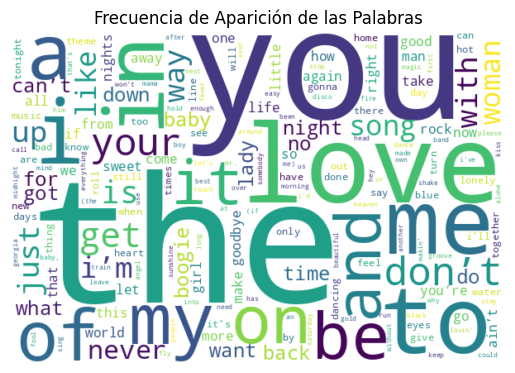

In [1224]:
# Concatenación de los registros auxiliares a nuestros datos de interés.
tracks = pd.concat([modified_dataset["Track"], registros_auxiliares["Track"]], ignore_index=True)

# Medición de la frecuencia de aparición de las palabras.
palabras = tracks.str.lower().str.split().explode().value_counts().to_dict()

# Elimino los paréntesis de aquellas entradas del diccionario que los contengan.
palabras_sin_parentesis = {re.sub(r'[\(\)]', '', key): value for key, value in palabras.items()}

# Creación de una nube de palabras.
wordcloud = wd(
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(palabras)

# Presentación del gráfico creado.
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de las Palabras")
plt.show()


Se observa una cantidad signficativa de preposiciones, pronombres, artículos y otros tipos de palabras sobre las que no se tiene interés en analizar. Por consiguiente, se descartaron:

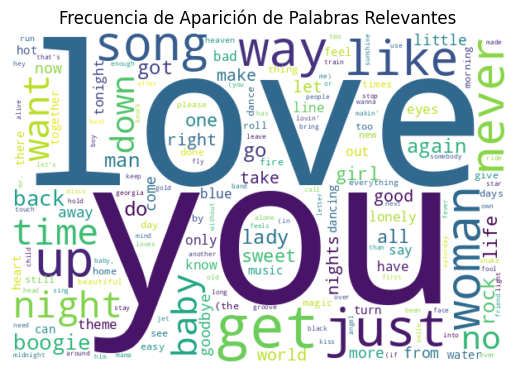

In [1225]:
# Lista de palabras a eliminar.
palabras_a_eliminar = ["i’ll", "he’s", "she’s", "you’re", "we’re", "the", "of", "to", "don’t", "won’t", "ain’t", "when", "with", "in", "on", "and", "for",
                "this", "that", "i’m", "a", "me", "my", "i", "is", "be", "it", "what", "your", "how", "&", "gonna", "I’ve", "you’ve", "we’ve", "it’s",
                "’s", "no'", "can’t", "’ve", "’d", "’ll", "an", "at", "will", "we", "if", "why", "us", "could", "i’d", "he’d", "she’d", "we’d", "are",
                "so", "not", "that's"]

# Filtrado de palabras de interés.
for palabra in palabras_a_eliminar:
    palabras.pop(palabra.lower(), None) # "None" sirve para que no haya un error en caso de que no exista la palabra.

# Creación de la nube de palabras.
wordcloud = wd(
        background_color="white",
        random_state=123,
        width=300,
        height=200,
        scale=2,
).generate_from_frequencies(palabras)

# Presentación del gráfico.
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frecuencia de Aparición de Palabras Relevantes")
plt.show()


Es posible observar una repetición frecuente de palabras de índole romántico, tales como *love*, *woman*, *girl*, *lady*, *night*, *baby*, *tonight*, *sweet*, *hot*, etc.

Como otro punto de análisis, surgió la necesidad de corroborar si el título de todas las pistas se hallaba en inglés. Para ello, se utilizó **lingua**, una librería para reconocimiento de lenguaje:

In [1226]:
# Definición de los idiomas.
idiomas = [Language.ENGLISH, Language.FRENCH, Language.GERMAN, Language.SPANISH]

# Construcción del detector.
detector = LanguageDetectorBuilder.from_languages(*idiomas).build()

modified_dataset["Track_Language"] = [
    detector.detect_language_of(x).name for x in modified_dataset["Track"]
]

modified_dataset[["Track", "Artist", "Track_Language"]]

,Track,Artist,Track_Language
0,Abc,The Jackson 5,ENGLISH
1,Let It Be,The Beatles,GERMAN
2,I Want You Back,The Jackson 5,ENGLISH
3,Cecilia,Simon & Garfunkel,SPANISH
4,Spirit In The Sky,Norman Greenbaum,ENGLISH
...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,ENGLISH
976,Don’t Cry Out Loud,Melissa Manchester,ENGLISH
977,When You’re In Love With A Beautiful Woman,Dr. Hook,ENGLISH
978,I’ll Never Love This Way Again,Dionne Warwick,ENGLISH


El detector es potente, pero no es bueno detectando el idioma de textos de corta longitud, especialmente si no están en inglés. Por lo tanto, se filtraron aquellas filas detectadas con un idioma distinto al inglés, se almacenaron en un archivo CSV y se analizaron manualmente:

In [1227]:
modified_dataset[modified_dataset["Track_Language"] != "ENGLISH"].to_csv("Resources/Datasets/Generados/NotEnglishTracks.csv")

Como resultado del análisis, se halló una pista cuyo título está en español. La pista es *Eres Tú* de Mocedades, la cual fue muy famosa en el público anglosajón:

In [1228]:
modified_dataset[modified_dataset["Track"] == "Eres Tú"]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length,Track_Language
395,Eres Tú,Mocedades,242,4,0.639,0.399,5,-11.815,1,0.0248,0.484,0.00056,0.133,0.306,79.113,72,1974,2,SPANISH


Así, es posible comprobar que todas las pistas del *dataset* tienen su título en inglés, a excepción de una. Con esto en cuenta, se eliminó la columna creada *Track_Language*, puesto a que no será utilizada en futuros análisis:

In [1229]:
modified_dataset = modified_dataset.drop(columns=["Track_Language"])

Conclusiones de la variable:
- La mayoría de las pistas contienen cinco o menos palabras en su título.
- Hay una presencia elevada de palabras de índole romántico en los títulos.
- El nombre de todas las pistas está en inglés, exceptuando una: "Eres tú" de Mocedades, la cual fue muy popular en el público anglosajón.

### *Artist*.

Como consecuencia del análisis de la variable *Track*, puesto a que el título de todas las canciones, exceptuando una, están en inglés y que hay una relativamente elevada frecuencia en el título de las pistas de las palabras *aint't* y *gonna* (expresiones informales muy frecuentes del inglés hablado en Estados Unidos), surgió la necesidad de comprobar si todas las canciones corresponden a artistas estadounidenses.

Para poder validar esto, utilizamos la API MusicBrainzngs para obtener la nacionalidad de cada artista. Debido a que el proceso realizado por la API toma demasiado tiempo, junto al trabajo, se adjunta un archivo en Python con el algoritmo. Este puede ser hallado dentro de los recursos, en la carpeta ***Functions***, bajo el nombre de ***MusicBrainzngs.py***.

In [1230]:
# Guardado de los artistas en un archivo para su uso en el algoritmo que utiliza la API.
pd.concat([modified_dataset["Artist"], registros_auxiliares["Artist"]], ignore_index=True).to_csv("Resources/Datasets/Generados/ArtistDataset.csv")

Las búsqueda ofrecida por la API no es exacta y a veces no se halla el artista con el nombre tal y como aparece en el dataset. Esto último producto de que, por ejemplo, a veces el artista son en realidad varios artistas, como en el ejemplo a continuación:

In [1231]:
# Ejemplo de colaboración entre artistas.
modified_dataset[modified_dataset["Artist"].str.contains("/")][["Track", "Artist"]]

,Track,Artist
95,Imagine,John Lennon / Plastic Ono Band


 Por lo tanto, fue necesario hacer el chequeo manual de cada uno de los artistas no coincidentes con el nombre proporcionado por la API y separarse las colaboraciones en dos artistas distintos. Adicionalmente, tuvieron que identificarse y eliminarse artistas repetidos:

In [1232]:
# Lectura del dataset con la nacionalidad de los artistas.
artist_dataset = pd.read_csv("Resources/Datasets/Generados/ArtistsNationalities.csv")

# Generación de archivo con los artistas cuyo nombre difiere.
artist_dataset[artist_dataset["Artista"] != artist_dataset["Nombre"]].to_csv("Resources/Datasets/Generados/ArtistDiffers.csv", index=False)

El resultado es el siguiente *dataset*, el cual contiene, para cada artista, su nacionalidad:

In [1233]:
nationality_artists = pd.read_csv("Resources/Datasets/Generados/CheckedArtists.csv")

nationality_artists

,Artist,Nationality
0,The Jackson 5,US
1,The Beatles,GB
2,Simon & Garfunkel,US
3,Norman Greenbaum,US
4,Edison Lighthouse,GB
...,...,...
530,Frank Mills,CA
531,Bonnie Pointer,US
532,McFadden & Whitehead,US
533,Rickie Lee Jones,US


Durante el proceso, además, se identificaron distintos nombres con los que un mismo artisto fue cargado. Estos fueron detallados en el siguiente CSV:

In [1234]:
alternative_artist_names = pd.read_csv("Resources/Datasets/Generados/AlternativeArtistNames.csv")

alternative_artist_names

,Artista,Alternative_Name
0,The Jackson 5,The Jacksons
1,The Jackson 5,Jackson 5
2,The Carpenters,Carpenters
3,Dawn,Tony Orlando & Dawn
4,The Brotherhood of Man,Brotherhood of Man
5,The Four Tops,Four Tops
6,Alive N Kickin’,Alive 'n Kickin'
7,Tee Set,Tee-Set
8,Dawn,Tony Orlando and Dawn
9,Grass Roots,The Grass Roots


Finalmente, con el trabajo realizado y habiéndose verificado la validez de los datos, fue posible validar la hipótesis de que la mayoría de los artistas del *dataset* son estadounidenses:

In [1235]:

# Creación del histograma.
fig = px.histogram(nationality_artists, x="Nationality", width=800, height=400,)

# Ajuste de los títulos de los ejes.
fig.update_layout(
    title="Distribución de los Artistas por Nacionalidad",
    yaxis_title_text="Cantidad de Artistas",
    xaxis_title_text="Nacionalidad",
    xaxis={'categoryorder': 'total descending'}  # Ordenamiento de mayor a menor cantidad de artistas.
)

configurar_fondo(fig)

fig.show()

Conclusiones de la variable:
- Hay un total de 535 artistas únicos en el *dataset*.
- La mayoría de ellos (399 artistas) son estadounidenses.
- De los artistas restantes (136), 80 son británicos y 22, canadienses.
- El resto de artistas se hallan repartidos en proporciones muy pequeñas en otros países.

### *Duration*.

Para analizar la variable, se realizó un *scatter plot* de ella:

In [1236]:
# Creación del gráfico de distribución.
fig = px.scatter(modified_dataset, y="Duration", title='Scatter de Duration', width=800, height=400)

configurar_fondo(fig)

fig.show()

A partir del anterior gráfico, se detectó una pista con una duración sobresaliente de 1561 segundos, lo cual equivale a aproximadamente 26 minutos. La pista en cuestión es la siguiente:

In [1237]:
# Obtención de la duración máxima del dataset.
duracion_maxima = modified_dataset["Duration"].max()

# Obtención de la pista cuya duración coincide con la calculada anteriormente.
pista_mas_larga = modified_dataset[modified_dataset["Duration"] == duracion_maxima]

pista_mas_larga[["Track", "Artist", "Duration"]]

,Track,Artist,Duration
449,Tubular Bells,Mike Oldfield,1561


Al realizar la búsqueda, se descubrió que *Tubular Bells* es, en realidad, un disco con una duración de 48 minutos. Uno de sus lados, el primero, denominado *Tubular Bells, Part One*, es el que tiene una duración de 26 minutos. En él, se hallan un sinfín de melodías.

El álbum contiene dentro varias canciones y no es posible validar si los demás datos corresponden a una de las melodías, a todas o ni siquiera si son correctos. Debido a estas peculiaridades frente al resto de registros en el *dataset*, se tomó la decisión de eliminar la entrada:

In [1238]:
modified_dataset = modified_dataset.drop(pista_mas_larga.index)

modified_dataset[['Track','Artist','Duration']].sort_values("Duration", ascending=False)

,Track,Artist,Duration
645,Love To Love You Baby,Donna Summer,1008
920,Promises,Eric Clapton,646
348,Pillow Talk,Sylvia,645
846,Feels So Good,Chuck Mangione,582
381,Also Sprach Zarathustra (2001),Deodato,539
...,...,...,...
865,What’s Your Name,Lynyrd Skynyrd,87
149,Bring The Boys Home,Freda Payne,87
227,Day Dreaming,Aretha Franklin,80
571,Dynomite,Tony Camillo’s Bazuka,77


De igual forma, puede observarse en el *scatter plot* otra pista con una duración sobresaliente: *Love To Love You Baby*, de Donna Summer, con una duración de 1008 segundos (17 minutos aproximadamente). Al igual que en el caso anterior, se trata de un error de carga, puesto a que el *dataset* abarca pistas, mientras que la duración especificada para *Love to Love You Baby* no corresponde a la de la pista, sino a la del álbum de mismo nombre.


In [1239]:
# Obtención de la duración máxima del dataset.
duracion_maxima = modified_dataset["Duration"].max()

# Obtención de la pista cuya duración coincide con la calculada anteriormente.
pista_mas_larga = modified_dataset[modified_dataset["Duration"] == duracion_maxima]

pista_mas_larga[["Track", "Artist", "Duration"]]

,Track,Artist,Duration
645,Love To Love You Baby,Donna Summer,1008


Debido a que no es posible comprobar la validez de los datos y si corresponden al álbum o al *single*, se tomó la decisión de eliminar el registro del *dataset*:

In [1240]:
modified_dataset = modified_dataset.drop(pista_mas_larga.index)

modified_dataset[['Track','Artist','Duration', "Tempo"]].sort_values("Duration", ascending=False)

,Track,Artist,Duration,Tempo
920,Promises,Eric Clapton,646,114.669
348,Pillow Talk,Sylvia,645,104.987
846,Feels So Good,Chuck Mangione,582,103.658
381,Also Sprach Zarathustra (2001),Deodato,539,114.751
573,That’s The Way Of The World,"Earth, Wind & Fire",523,90.017
...,...,...,...,...
865,What’s Your Name,Lynyrd Skynyrd,87,112.023
149,Bring The Boys Home,Freda Payne,87,157.963
227,Day Dreaming,Aretha Franklin,80,85.295
571,Dynomite,Tony Camillo’s Bazuka,77,93.826


Por último, se observó que las dos canciones restantes con la mayor duración también se encuentran mal cargadas: *Promises* de Eric Clapton tiene, en realidad, una duración de 3:20 minutos (200 segundos); y *Pillow Talk* de Silvia, de 4:26 (266 segundos). Al igual que con los anteriores registros, no es posible validar si es el único dato cargado erróneamente dentro de los registros. Por consiguiente, se procedió a su eliminación:

In [1241]:
# Obtención de las dos pistas con mayor duración del dataset.
pistas_mayor_duracion = modified_dataset["Duration"].nlargest(2)

# Eliminación de las dos pistas con mayor duración.
modified_dataset = modified_dataset.drop(pistas_mayor_duracion.index)

modified_dataset[['Track','Artist','Duration']].sort_values("Duration", ascending=False)

,Track,Artist,Duration
846,Feels So Good,Chuck Mangione,582
381,Also Sprach Zarathustra (2001),Deodato,539
573,That’s The Way Of The World,"Earth, Wind & Fire",523
193,American Pie,Don McLean,516
863,"Dance, Dance, Dance (YOWSAH, Yowsah, Yowsah)",Chic,501
...,...,...,...
865,What’s Your Name,Lynyrd Skynyrd,87
149,Bring The Boys Home,Freda Payne,87
227,Day Dreaming,Aretha Franklin,80
571,Dynomite,Tony Camillo’s Bazuka,77


Con los valores de la variable limpios, usando un *boxplot*, se analizó la duración en la que suelen rondar la mayoría de las canciones:

In [1242]:
fig = px.box(modified_dataset, y="Duration", title='Distribución de la variable "Duration"', width=800, height=400)

configurar_fondo(fig)

fig.show()

#### Conclusiones.

- La mayoría de las canciones del *dataset* tiene una duración de entre 184.5 segundos (aproximadamente tres minutos) y 251 segundos (un poco más de cuatro minutos).
- Hay canciones que quedan fuera de este rango; no obstante, se comprobó que no son *outliers*.

### *Time_Signature*

Para comenzar a analizar la variable, se realizó un histograma de esta:

In [1243]:
# Creación del histograma.
fig = px.histogram(modified_dataset, x="Time_Signature", width=800, height=400)

# Agregado de título y personalización del título de los ejes.
fig.update_layout(
    title="Distribución de los Compases en el Dataset",
    xaxis_title="Compás (Time Signature)",
    yaxis_title="Frecuencia Absoluta",
    bargap=0.2  # Ajuste del espacio entre barras.
)

configurar_fondo(fig)

fig.show()

En el histograma anterior, es fácil notar que la mayoría de las canciones tiene un compás de 4. A su vez, es posible observar una muy pequeña cantidad de registros con compás 1 (tres registros) y compás 5 (dos registros). Al investigar, se halló que son valores de compás extremadamente raros, pero que existen canciones que los utilizan. Debido a su peculiaridad, se tomó la decisión de analizar dichos registros a fondo:

In [1244]:
ts1and5_songs = modified_dataset[(modified_dataset["Time_Signature"] == 1) | (modified_dataset["Time_Signature"] == 5)]

ts1and5_songs[["Track", "Artist", "Time_Signature"]]

,Track,Artist,Time_Signature
466,Love’s Theme,Love Unlimited Orchestra,1
483,I’m Sorry,John Denver,5
506,Lucy In The Sky With Diamonds,Elton John,1
563,Love Won’t Let Me Wait,Major Harris,1
871,My Angel Baby,Toby Beau,5


Se realizó la búsqueda en Internet de los detalles de cada una de las canciones anteriores y se halló que ninguno de estos son consistentes con los especificado en el *dataset*. Como consecuencia de que el compás no es el único dato erróneo que tienen los registros, se optó por eliminarlos:

In [1245]:
modified_dataset = modified_dataset.drop(ts1and5_songs.index)

Conclusiones.
- La mayoría de las canciones tiene cuatro pulsaciones por compás, lo cual es lo más común hoy en día.
- Una pista con una pulsación por compás o cinco pulsaciones por compás es extremadamente rara.

### *Danceability*.

Para estudiar la variable, se decidió como primer paso realizar un *boxplot* de esta:

In [1246]:
fig = px.box(modified_dataset, x="Danceability", title="Boxplot de la Bailabilidad", width=800, height=400, notched=True)

configurar_fondo(fig)

fig.show()

A partir del *boxplot*, se detectaron tres posibles *outliers*. Para determinar si efectivamente lo son o no, se analizó cada uno de ellos:

In [1247]:
# Cálculo del rango intercuartílico.
Q1 = modified_dataset["Danceability"].quantile(0.25)
Q3 = modified_dataset["Danceability"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo del límite inferior.
danceability_lower_fence = Q1 - 1.5 * IQR

danceability_posibles_outliers = modified_dataset[modified_dataset["Danceability"] < danceability_lower_fence]

danceability_posibles_outliers[["Track", "Artist", "Danceability"]]

,Track,Artist,Danceability
137,Ain’t No Sunshine,Bill Withers,0.0942
436,The Streak,Ray Stevens,0.1640
947,You Don’t Bring Me Flowers,Neil Diamond & Barbra Streisand,0.1600


Posterior a su escucha y análisis, se concluyó que no se tratan de *outliers*, sino de canciones realmente tristes y poco bailables. Por consiguiente, se conservaron en el *dataset*.

Conclusiones:

- Se identificaron posibles *outliers* que, luego de su análisis, fueron descartados.

### *Energy*.

Se realizó un *boxplot* para estudiar la variable:

In [1248]:
# Creación del boxplot.
fig = px.box(modified_dataset, x="Energy", title='Boxplot de la variable "Energy"', width=800, height=400, notched=True)

configurar_fondo(fig)

fig.show()


Analizando el gráfico, no es posible observar valores atípicos. Por otro lado, se puede notar una distribución bastante normal, con un leve sesgo a izquierda, el cual es posible verificar mediante el coeficiente de asimetría:

In [1249]:
modified_dataset["Energy"].skew()

np.float64(-0.1404345564562234)

Conclusiones:

- No se hallaron extravagancias en la variable.
- Su distribución posee un leve sesgo a izquierda.

### *Key*.


Acorde a la teoría musical, la equivalencia entre la nota, de acuerdo al cifrado anglosajón, y el valor de la variable utilizado en el *dataset* es:


In [1250]:
equivalencia_notas = {0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

Se realizó un gráfico de la frecuencia relativa de cada nota para determinar cuáles son aquellas más frecuentes. Además, se consideró interesante determinar si la frecuencia relativa de las tonalidades en los 70's es representativa del último siglo. Por consiguiente, se graficó, además, junto a la frecuencia relativa de cada tonalidad en los 70's, su frecuencia relativa en el último siglo, sacando provecho, para ello, del *dataset* extendido:

In [1251]:
# Obtención de la frecuencia relativa de las tonalidades en el dataset original.

key_dataset = modified_dataset.copy()

notas_original = key_dataset["Key"].value_counts()

notas_original = notas_original.astype("float64")

notas_original = notas_original.rename(index=equivalencia_notas)

total_original = key_dataset.shape[0]

# Obtención de la frecuencia relativa de las tonalidades en el dataset extendido.

key_dataset_extendido = sp.copy()

notas_extendido = key_dataset_extendido["key"].value_counts()

notas_extendido = notas_extendido.astype("float64")

notas_extendido = notas_extendido.rename(index=equivalencia_notas)

total_extendido = key_dataset_extendido.shape[0]

# Crear de un dataset combinado.
combined = pd.DataFrame({'Original [1970, 1980)': notas_original, 'Extendido [1920, 2022]': notas_extendido})

# Normalización de las frecuencias relativas
combined['Original [1970, 1980)'] = combined['Original [1970, 1980)'] / total_original
combined['Extendido [1920, 2022]'] = combined['Extendido [1920, 2022]'] / total_extendido

# Ordenamiento de las frecuencias relativas de acuerdo al dataset original.
combined = combined.sort_values(by='Original [1970, 1980)', ascending=False)

# Creación de un gráfico de barras.
fig = px.bar(
        combined, 
        x=combined.index, 
        y=['Original [1970, 1980)', 'Extendido [1920, 2022]'],
        labels={
        'value': 'Frecuencia relativa',
        'variable': 'Dataset',
        'index': 'Tonalidad',
        },
        title='Distribución de la Frecuencia Relativa de las Tonalidades',
        barmode='group',
        width=800,
        height=600
)

configurar_fondo(fig)

# Mostrar el gráfico
fig.show()

Gráficamente, es posible observar que, en general, la frecuencia relativa de las tonalidades del *dataset* es significativamente representativa de la frecuencia relativa de las tonalidades en el último siglo. En la sección *4. Test de Hipótesis*, a través de una prueba formal, se realizará la demostración de la hipótesis.

Conclusiones:

- La tonalidad más frecuencte es C, mientras que la menos frecuente es D#.
- Las frecuencias relativas de las tonalidades en los 70's parecen ser representativas del último siglo.

### *Loudness*.

Se realizó un *boxplot* de la variable para estudiarla:

In [1252]:
fig = px.box(modified_dataset, x="Loudness", width=800, height=400, title='Boxplot de Loudness')

configurar_fondo(fig)

fig.show()

Se detectaron nueve posibles *outliers*:

In [1253]:
# Cálculo del rango intercuartílico.
Q1 = modified_dataset["Loudness"].quantile(0.25)
Q3 = modified_dataset["Loudness"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo del límite inferior.
loudness_lower_fence = Q1 - 1.5 * IQR

loudness_posibles_outliers = modified_dataset[modified_dataset["Loudness"] < loudness_lower_fence]

loudness_posibles_outliers

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Track_Length
137,Ain’t No Sunshine,Bill Withers,192,4,0.0942,0.99500,2,-27.090,0,0.0514,0.315,0.970000,0.9570,0.00001,83.334,53,1971,3
226,The First Time Ever I Saw Your Face,Roberta Flack,260,4,0.3110,0.02640,0,-21.644,1,0.0370,0.731,0.002050,0.1560,0.13900,120.653,59,1972,8
227,Day Dreaming,Aretha Franklin,80,4,0.2130,0.07510,7,-27.103,1,0.0433,0.971,0.441000,0.1130,0.03460,85.295,58,1972,2
245,Garden Party,Ricky Nelson,229,4,0.7740,0.24700,2,-21.657,1,0.0779,0.786,0.018600,0.1160,0.80300,143.955,51,1972,2
316,Clair,Gilbert O’Sullivan,268,4,0.3350,0.00532,1,-31.646,1,0.0376,0.994,0.912000,0.0621,0.03970,65.832,65,1973,1
666,That’ll Be The Day,Linda Ronstadt,158,4,0.5600,0.14000,1,-20.439,1,0.0325,0.862,0.968000,0.0927,0.05890,74.483,32,1976,4
731,I’m In You,Peter Frampton,96,4,0.4850,0.00880,5,-30.000,1,0.0507,0.996,0.940000,0.1140,0.18900,85.778,58,1977,3
820,Jack And Jill,Raydio,99,4,0.5190,0.02650,7,-26.128,1,0.0554,0.992,0.940000,0.0986,0.52300,98.470,63,1978,3
834,Three Times A Lady,Commodores,217,3,0.3900,0.08030,8,-20.518,1,0.0306,0.874,0.000639,0.1270,0.18400,150.503,55,1978,4


Determinar si se tratan de *outliers* no es posible, puesto que para ello sería necesaria la pista original y de la que provengan los datos del *dataset*. No obstante, los valores especificados son valores lógicos y frecuentes en canciones del pasado. Por lo mismo, no se consideraron *outliers* y se mantuvieron en el análisis.

Rangos altos de posibles decibeles eran comunes en décadas anteriores. Hoy en día, con la finalidad de que no sea necesario cambiar constamente el volumen del dispositivo al pasar de una pista a otra, los valores se normalizan.

Conclusiones:

- Se detectaron posibles *outliers*, no obstante, posteriormente fueron descartados.

### *Mode*.

Se estudió la frecuencia de la variable, realizando para ello un gráfico de torta:

In [1254]:
# Cálculo de valores.
valores_mode = modified_dataset["Mode"].value_counts().reset_index()
valores_mode.columns = ["Categoria", "Cantidad"]

# Creación del gráfico de torta.
fig = px.pie(
    valores_mode, 
    values="Cantidad", 
    names=["Mayor", "Menor"], 
    title='Distribución del Tono (Mode)'
)

# Personalización de los tooltips.
fig.update_traces(
    hovertemplate="Tono: %{label}<br>Cantidad de Registros: %{value}<extra></extra>",
    textinfo='percent+label'
)

fig.update_layout(
    showlegend=True,
    width=800,  # Aumenta el tamaño del gráfico
    height=400,  # Aumenta el tamaño del gráfico
    margin=dict(t=50, b=50, l=50, r=50)  # Reducimos los márgenes para minimizar el espacio blanco
)

fig.show()

Como es posible observar, aproximadamente, un 75 % de las pistas tienen tonalidades expresadas en tono mayor. Esto, generalmente, es asociado con pistas más alegres y optimistas.

Conclusiones:

- La mayor parte de las pistas en el *dataset* original se hallan en tono mayor.

### *Speechiness*.

Se realizó un histograma de la variable para estudiarla:

In [1255]:
# Creación del histograma.
fig = px.histogram(modified_dataset, x="Speechiness", title='Histograma de la Variable "Speechiness"',
                        width=800, height=400, nbins=150)

fig.update_layout(
    xaxis_title_text="Speechiness",
    yaxis_title_text="Cantidad de Registros",
    bargap=0.3
)

configurar_fondo(fig)

fig.show()


Se observa un gran sesgo positivo (a derecha), con la mayoría de los valores de la variable menores a 0.1, el cual fue verificado mediante el coeficiente de asimetría:

In [1256]:
# Calcula el coeficiente de asimetría para cada columna
print(f"Coeficiente de asimetría para la variable Speechiness: {modified_dataset["Speechiness"].skew()}")

Coeficiente de asimetría para la variable Speechiness: 4.421126567684912


Se tomó la decisión de analizar aquellos registros que más sesgaban la distribución y comprobar si se tratan de *outliers*:

In [1257]:
clean_dataset[clean_dataset["Speechiness"] > 0.4]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
178,Mama’s Pearl,The Jackson 5,407,4,0.365,0.887,9,-9.936,1,0.452,0.0378,0.003320,0.4320,0.426,155.164,23,1971
251,Freddie’s Dead,Curtis Mayfield,148,4,0.821,0.574,1,-4.872,1,0.405,0.0536,0.000006,0.0799,0.441,170.941,47,1972
337,Monster Mash,Bobby ‘Boris’ Pickett,192,4,0.541,0.504,11,-14.191,0,0.457,0.3750,0.000000,0.4210,0.707,68.482,54,1973
347,Boogie Woogie Bugle Boy,Bette Midler,161,4,0.640,0.479,7,-11.550,1,0.467,0.8810,0.000171,0.0973,0.790,166.868,49,1973
394,Jungle Boogie,Kool & the Gang,174,4,0.538,0.520,7,-11.063,0,0.737,0.3080,0.000000,0.2140,0.551,180.274,73,1974
524,Old Days,Chicago,195,4,0.599,0.710,1,-7.390,1,0.576,0.3510,0.000000,0.1130,0.572,82.243,59,1975
573,That’s The Way Of The World,"Earth, Wind & Fire",523,4,0.265,0.969,1,-5.062,1,0.448,0.0160,0.000223,0.7170,0.302,90.017,15,1975
899,Lotta Love,Nicolette Larson,333,4,0.412,0.902,9,-11.600,1,0.405,0.0484,0.131000,0.4050,0.422,89.740,74,1979


Al escuchar las pistas y compararlas con aquellas con valores de *Speechiness* más bajos, se concluyó que no se tratan de *outliers*, sino que, efectivamente, determinan canciones con cualidades más parecidas al habla que al canto. El ejemplo más claro es la canción con el valor de *Speechiness* más alto: *Jungle Boogie* de Koll & the Gang.

Conclusiones:

- La distribución de la variable se halla considerablemente sesgada a derecha.
- Al analizar los valores que más sesgan la distribución, se determinó que no se tratan de *outliers*.

### *Acousticness*.

La variable es una **medida de probabilidad** de que la pista sea acústica. Por lo mismo, una canción con alto valores de *Acousticness* no necesariamente nos habla de una canción acústica. Esto, por supuesto, dificulta el análisis de la variable, puesto a que se desconoce cuáles son las características consideradas para dotar a una pista de mayores o menores probabilidades.

In [1258]:
fig = px.histogram(modified_dataset, x="Acousticness", title="Distribución de la variable 'Acousticness'", width=800, height=400)

fig.update_layout(
    xaxis_title_text="Probabilidad de que la Pista sea Acústica",
    yaxis_title_text="Cantidad de Registros",
    bargap=0.2
)

configurar_fondo(fig)

fig.show()

Al observarse el histograma, puede notarse un sesgo a derecha, el cual puede ser comprobado mediante el coeficiente de asimetría:

In [1259]:
# Calcula el coeficiente de asimetría para cada columna
print(f"Coeficiente de asimetría para la variable Acousticness: {modified_dataset["Acousticness"].skew()}")

Coeficiente de asimetría para la variable Acousticness: 0.6075314508172941


Debido a tratarse de una medida de probabilidad, no es posible determinar con seguridad cuántas de las canciones son acústicas. Sin embargo, sí es posible concluir es que el conjunto de canciones con bajas probabilidades de ser acústicas es mayor al de las canciones con altas probabilidades de serlo. Por consiguiente, es más probable que, de seleccionarse una pista aleatoria del *dataset*, esta no sea acústica.

Conclusiones:

- De seleccionarse una pista aleatoria del *dataset*, lo más probable es que esta no sea acústica.

### *Instrumentalness*.

Se realizó un *boxplot* de la variable para su estudio:

In [1260]:
fig = px.box(modified_dataset, x="Instrumentalness", width=800, height=400, title="Boxplot de la Variable Instrumentalness")

configurar_fondo(fig)

fig.show()

Es posible observar en el gráfico una significativa cantidad de valores que se escapan del límite superior. Se decidió analizar algunas de dichas pistas para descubrir el por qué detrás de su comportamiento:

In [1261]:
# Cálculo del rango intercuartílico.
Q1 = modified_dataset["Instrumentalness"].quantile(0.25)
Q3 = modified_dataset["Instrumentalness"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo del límite superior.
instrumentalness_upper_fence = Q3 + 1.5 * IQR

instrumentalness_posibles_outliers = modified_dataset[modified_dataset["Instrumentalness"] > instrumentalness_upper_fence]

instrumentalness_posibles_outliers[["Track", "Artist", "Instrumentalness"]]

,Track,Artist,Instrumentalness
7,The House Of The Rising Sun,Frijid Pink,0.21800
8,Fire And Rain,James Taylor,0.01190
12,Venus,Shocking Blue,0.61000
14,Lola,The Kinks,0.48500
17,Raindrops Keep Fallin’ On My Head,B.J. Thomas,0.01800
...,...,...,...
960,Music Box Dancer,Frank Mills,0.82000
965,Ain’t No Stoppin’ Us Now,McFadden & Whitehead,0.13100
966,Don’t Bring Me Down,Electric Light Orchestra,0.08360
969,A Little More Love,Olivia Newton-John,0.00944


Al analizar las pistas con valores más alto de *Instrumentalness*, se encontró que muchas de ellas tienen una alta presencia de voces. Por consiguiente, contrario al primer pensamiento, surgió la idea de que la voz pueda ser interpretada como un instrumento y, que en realidad, la variable indique la confianza con la que una canción no contiene vocales. Para verificar esto, se analizaron las canciones con menor *Instrumentalness*:

In [1262]:
modified_dataset[modified_dataset["Instrumentalness"] < 0.0001][["Track", "Artist", "Instrumentalness"]]

,Track,Artist,Instrumentalness
0,Abc,The Jackson 5,0.000000
1,Let It Be,The Beatles,0.000000
3,Cecilia,Simon & Garfunkel,0.000005
5,Love Grows (WHERE My Rosemary Goes),Edison Lighthouse,0.000000
9,In The Summertime,Mungo Jerry,0.000000
...,...,...,...
970,In The Navy,Village People,0.000000
971,Mama Can’t Buy You Love,Elton John,0.000000
973,We’ve Got Tonight,Bob Seger & The Silver Bullet Band,0.000000
976,Don’t Cry Out Loud,Melissa Manchester,0.000009


Sin embargo, al escuchar pistas con valores de *Instrumentalness* bajos y compararlas con pistas con valores muy altos, no se halló ninguna diferencia en cuanto a los instrumentos, la presencia de voces ni ninguna otra característica. Se concluyó entonces que la variable no determina lo que dice determinar ni representa lo que su nombre indica.

Debido a que se desconoce qué es lo que la variable describe y que, por lo tanto, no es posible comprobar su validez ni sacar conclusiones acerca de ella, fue descartada del análisis:

In [1263]:
# Descarte de la variable "Instrumentalness".
modified_dataset = modified_dataset.drop(columns=["Instrumentalness"])

Conclusiones:

- Se decidió descartar la variable, puesto a que se desconoce qué es lo que indica y su validez.

### *Liveness*.

De igual forma que para *Acosuticness*, *Liveness* es otra medida de probabilidad. Sin embargo, en este caso, sí se conoce cuál es la característica utilizada para asociarle a una pista una mayor probabilidad de que haya sido realizada en vivo: el ruido de audiencia.

Se realizó un histograma de la variable para estudiar su distribución:

In [1264]:
fig = px.histogram(modified_dataset, x="Liveness", width=800, height=400, title="Distribución de la variable 'Liveness'")

fig.update_layout(
    xaxis_title_text="Probabilidad de que la pista se haya interpretado en vivo",
    yaxis_title_text="Cantidad de registros",
    bargap=0.2
)

configurar_fondo(fig)

fig.show()

De igual forma que para distribuciones de las variables analizadas anteriormente, es posible observar un sesgo a derecha el cual es comprobado con el coeficiente de asimetría:

In [1265]:
print(f"Coeficiente de asimetría para la variable Acousticness: {modified_dataset["Acousticness"].skew()}")

Coeficiente de asimetría para la variable Acousticness: 0.6075314508172941


Analizar aquellos registros que sesgan la distribución no es posible, puesto a que se desconoce cuál es exactamente la *pista* de la que se extrayeron los datos. Al realizar la búsqueda de una pista en Internet, es posible hallar muchas versiones de estas y se desconoce cúal fue la utilizada en el *dataset*. Por lo mismo, no es posible determinar si los valores que sesgan la distribución son, o no, *outliers*.

Conclusiones:

- La distribución de la variable presenta un notable sesgo a derecha.
- Determinar la correctitud de los valores en la variable no es posible, puesto a que implicaría contar con la pista de la que fueron extraídos los datos.

### *Valence*.

Se realizó un *boxplot* de la variable para analizarla:

In [1266]:
fig = px.box(modified_dataset, x="Valence", width=800, height=400, title="Boxplot de la variable 'Valence'")

configurar_fondo(fig)

fig.show()

No se observan peculiaridades en el gráfico. La distribución de la variable parece estar sesgada a izquierda, lo cual es posible comprobar mediante su coeficiente de asimetría:

In [1267]:
print(f"Coeficiente de asimetría para la variable Valence: {modified_dataset["Valence"].skew()}")

Coeficiente de asimetría para la variable Valence: -0.41468529266708254


El coeficiente de asimetría es menor a cero, por lo que se verifica que la distribución de "Valence" se halla sesgada a izquierda.

Conclusiones:

- La distribución de la variable se halla sesgada a izquierda.

### *Tempo*.

Se realizó un *boxplot* para estudiar la variable:

In [1268]:
fig = px.box(modified_dataset, x="Tempo", width=800, height=400)

configurar_fondo(fig)

fig.show()

Se observó que el *tempo* de la mayoría de las canciones varía entre 100 y 134. Además, se detectaron 17 posibles *outliers*:

In [1269]:
# Cálculo del rango intercuartílico.
Q1 = modified_dataset["Tempo"].quantile(0.25)
Q3 = modified_dataset["Tempo"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo del límite superior.
tempo_upper_fence = Q3 + 1.5 * IQR

tempo_posibles_outliers = modified_dataset[modified_dataset["Tempo"] > tempo_upper_fence]

tempo_posibles_outliers[["Track", "Artist", "Tempo"]]

,Track,Artist,Tempo
2,I Want You Back,The Jackson 5,196.606
85,La La La (IF I Had You),Bobby Sherman,200.423
171,Want Ads,Honey Cone,189.684
261,Precious And Few,Climax,201.467
286,Last Song,Edward Bear,203.812
317,Me And Mrs. Jones,Billy Paul,200.813
372,Daddy’s Home,Jermaine Jackson,205.747
380,Could It Be I’m Falling In Love,The Spinners,207.266
445,Best Thing That Ever Happened To Me,Gladys Knight & the Pips,189.498
572,Thank God I’m A Country Boy,John Denver,202.140


 Para verificar su validez, se realizó la búsqueda del *tempo* de cada una de las canciones. Principalmente, la página utilizada para ello fue: https://songbpm.com/, un repositorio con diversos datos de cada pista, entre ellos, su *tempo*.

 Luego de validar cada pista, se concluyó que ninguna de las anteriores pistas es un *outlier* y que sus valores de *tempo* son verídicos. Por esta misma razón, no fueron descartadas del *dataset*.

Conclusiones:

- Se detectaron posibles *outliers* en la variable. No obstante, posterior a su análisis, fueron descartadas como tal.

### *Popularity*.

Para el estudio de la variable, se optó por realizar un *boxplot*:

In [1270]:
fig = px.box(modified_dataset, x="Popularity", width=800, height=400, title="Boxplot de la Popularidad")

configurar_fondo(fig)

fig.show()

Es posible notar una distribución bastante simétrica, a excepción de aquellas valores que se escapan del límite inferior:

In [1271]:
# Cálculo del rango intercuartílico.
Q1 = modified_dataset["Popularity"].quantile(0.25)
Q3 = modified_dataset["Popularity"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo del límite inferior.
popularity_lower_fence = Q1 - 1.5 * IQR

popularity_posibles_outliers = modified_dataset[modified_dataset["Popularity"] < popularity_lower_fence]

popularity_posibles_outliers[["Track", "Artist", "Popularity"]]

,Track,Artist,Popularity
182,I’ll Meet You Halfway,the Partridge Family,6
183,That’s The Way I’ve Always Heard It Should Be,Carly Simon,1
185,I’ve Found Someone Of My Own,The Free Movement,0
382,I’m Doin’ Fine Now,New York City,8
479,I’m Leaving It Up To You,Donny and Marie Osmond,4
480,(I’VE Been) Searchin’ So Long,Chicago,0
481,(YOU’RE) Having My Baby,Paul Anka with Odia Coates,0
575,Can’t Get It Out Of My Head,Electric Light Orchestra,9
576,Doctor’s Orders,Carol Douglas,6
577,"You’re The First, The Last, My Everything",Barry White,4


Debido a que no es posible verificar la correctitud de los datos debido a que se desconoce en qué momento fue tomada la popularidad y cuáles fueron todas las características utilizadas para determinarla, se decidió descartar aquellos registros con valores de popularidad atípicos.

In [1272]:
modified_dataset = modified_dataset.drop(popularity_posibles_outliers.index)

Conclusiones:

- Se observaron valores atípicos en la variable, los cuales fueron descartados debido a que no es posible verificar su correctitud.

### *Year*.

Para el estudió de la variable, se optó por la realización de un histograma:

In [1273]:
# Creación del histograma.
fig = px.histogram(modified_dataset, x="Year", width=800, height=400, title="Distribución de las Pistas a lo largo de los Años")

# Actualización del nombre de los ejes y del espacio entre las barras.
fig.update_layout(
    xaxis_title_text='Año (Year)',
    yaxis_title_text='Cantidad de Registros',
    bargap=0.3
)

configurar_fondo(fig)

fig.show()

En el gráfico anterior, es posible observar una distribución bastante equitativa de canciones en cada uno de los años de la década, predominando en el *dataset*, por una mínima diferencia, canciones de 1973.

Conclusiones:

- Las pistas se hallan distribuidas de una forma bastante equitativa.

## 2.2 - Análisis Bivariado.

### Correlaciones entre Variables.

Como primer paso del análisis bivariado, se realizó un *heatmap* de la correlación lineal (correlación de Pearson) entre las variables numéricas, exceptuando aquellas dicotómicas (*Time_Signature* y *Mode*).

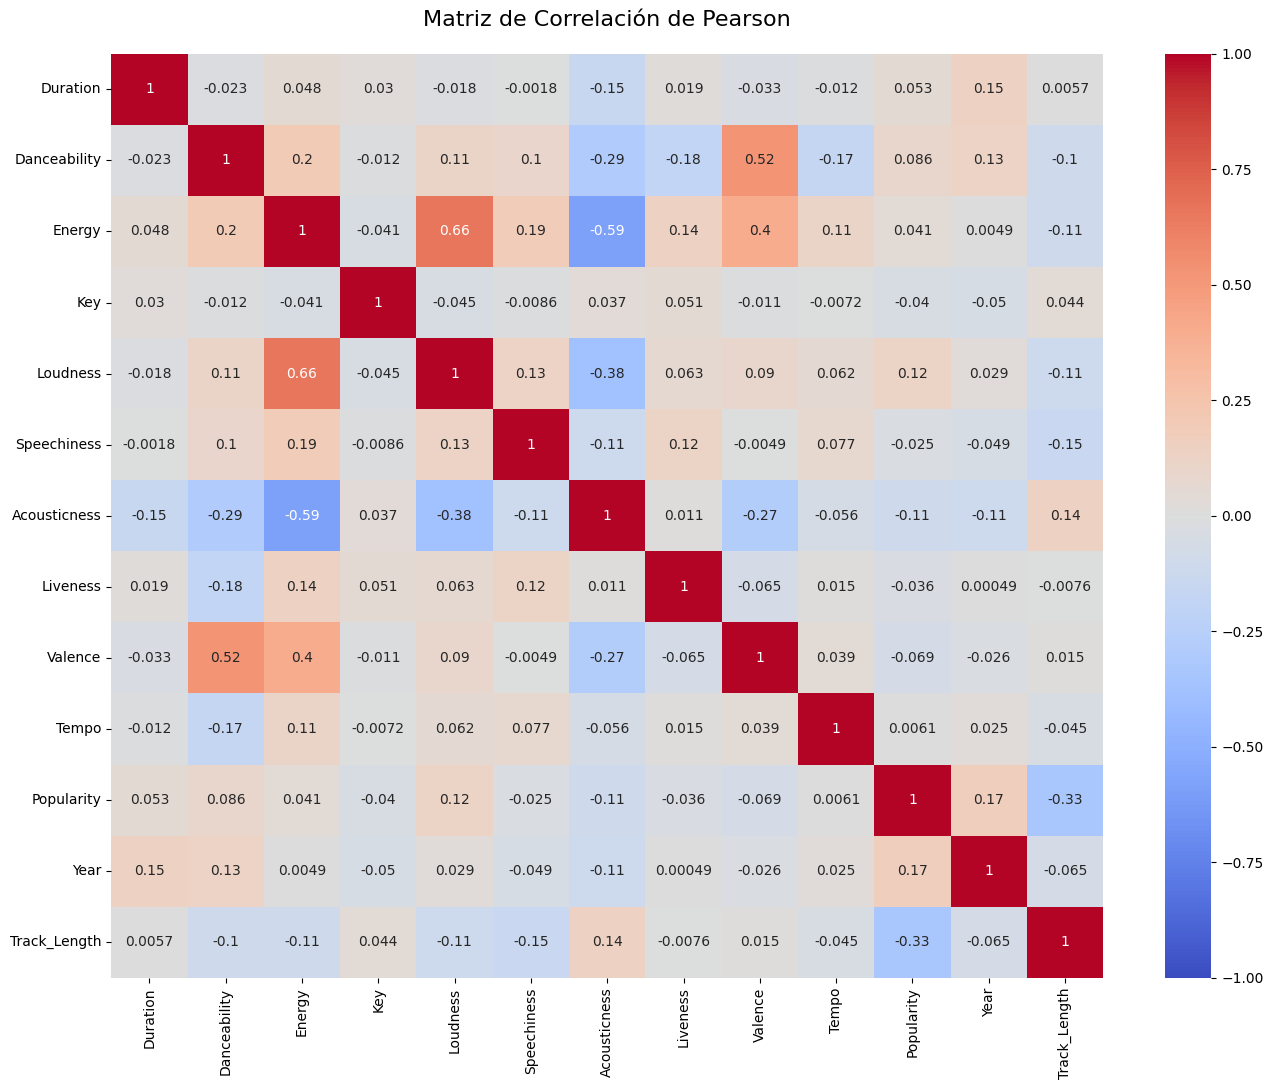

In [1274]:
# Obtención únicamente de aquellas columnas numéricas no dicotómicas.
numeric_columns = modified_dataset.select_dtypes(include=["number"])
reduced_dataset = numeric_columns.drop(columns=["Time_Signature", "Mode"])

# Cálculo de la matriz de correlaciones.
correlation_matrix = reduced_dataset.corr()

# Impresión de la matriz de correlaciones en formato de heatmap.
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= "coolwarm")
plt.title("Matriz de Correlación de Pearson", pad=20, size=16)
plt.show()

Lo ideal, para poder determinar si dos variables están correlacionadas linealmente, es que el valor absoluto de la correlación entre ellas sea mayor a 0.7 (al menos, eso propone la regla empírica). Sin embargo, debido a que no se cuenta con dichos valores, se tomaron las tres correlaciones con los valores absolutos más próximos para su estudio. De esta forma, se consideraron dignas de análisis las correlaciones entre las siguientes variables:

- *Energy* y *Loudness*: directamente lineal.
- *Acousticness* y *Energy*: inversamente lineal.
- *Danceability* y *Valence*: directamente lineal.

Sin embargo, es posible que haya correlaciones no lineales entre otras variables. Para identificarlas, se realizó el *scatter matrix* para cada combinación y se analizó cada uno de los gráficos:

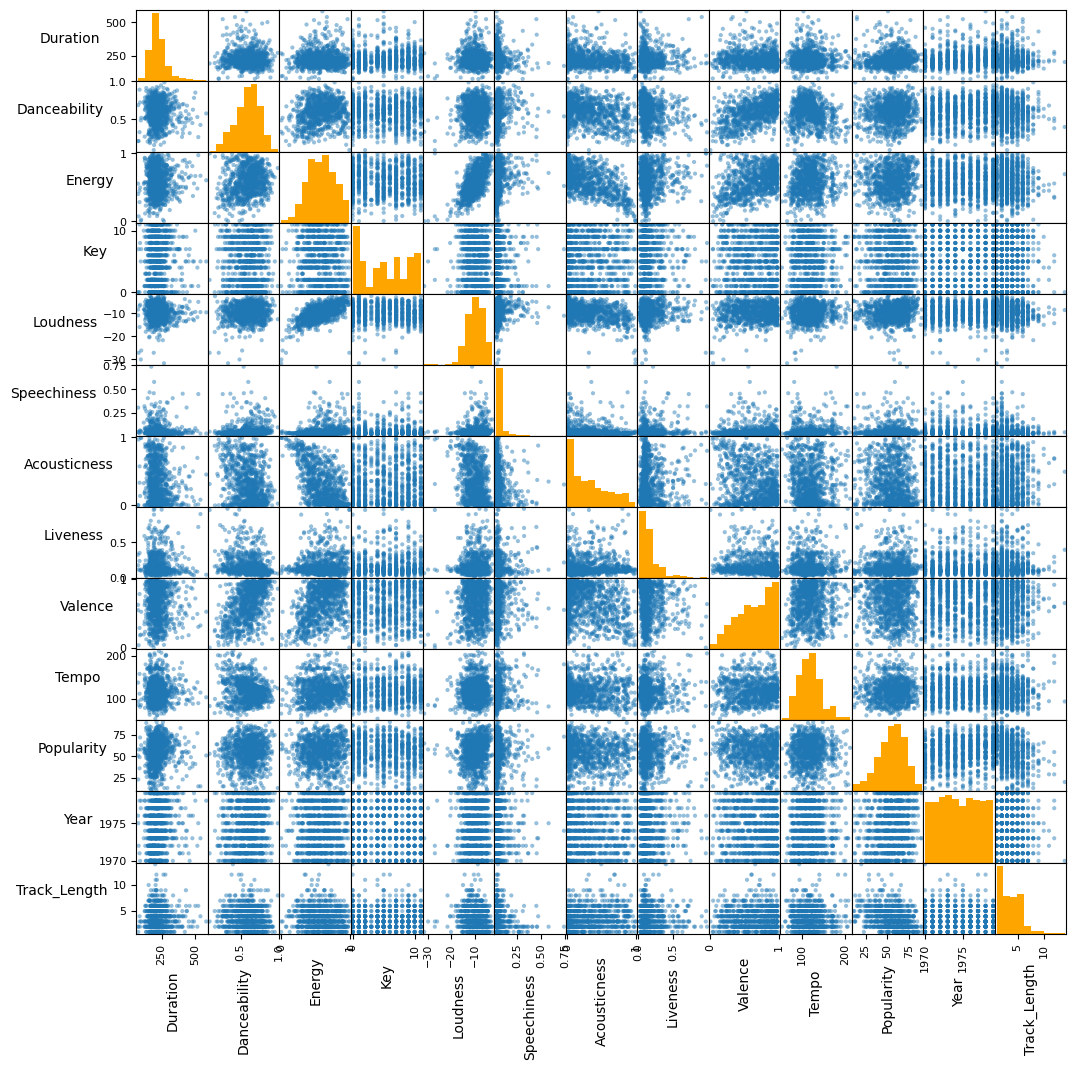

In [1275]:
# Creación de la "scatter matrix".
scatter_matrix = pd.plotting.scatter_matrix(reduced_dataset, figsize=(12, 12), alpha=0.47, hist_kwds={'color': 'orange'})

# Acomodado de los ejes y presentación del gráfico.
for i in range(len(reduced_dataset.columns)):
  for j in range(len(reduced_dataset.columns)):
    ax=scatter_matrix[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

Posterior al análisis, no se identificó ninguna posible correlación adicional, ya sea lineal o no lineal, que no haya sido seleccionada para su estudio mediante la matriz de correlaciones. Si bien es posible observar ciertos patrones entre algunas variables, por ejemplo, entre *Energy* y *Valence*, la dispersión de los puntos pareciera correspondar más a una nube amorfa que a una relación bien definida.

### *Energy y Loudness*.

Las variables presentan, de acuerdo a la matriz de correlación de Pearson, una correlación lineal de 0.66. Se realizó un *scatter plot* de ellas para determinar si, efectivamente, existe una relación o no:

In [1276]:
fig = px.scatter(modified_dataset, x="Loudness", y="Energy", width=800, height=400)

configurar_fondo(fig)

fig.show()

Efectivamente, parece haber una relación evidente entre los valores de *Loudness* y *Energy*: a medida que incrementa *Loudness*, también lo hace *Energy*. Sin embargo, hay varios puntos al inicio del gráfico que introducen ruido: estos son los posibles *outliers* identificados en el análisis de la variable *Loudness*.

Se realizó la prueba de sacarlos y ver cómo cambia el gráfico de dispersión sin ellos:

In [1277]:
fig = px.scatter(modified_dataset.drop(loudness_posibles_outliers.index), x="Loudness", y="Energy", width=800, height=400)

configurar_fondo(fig)

fig.show()

La relación lineal se hace más evidente. No obstante, si se retoma la descripción de la variable *Energy*, se especifica en esta: "una medida de **intensidad** y actividad en la canción, donde los valores más altos indican una pista más enérgica". ¿Qué es exactamente lo que se define como *intensidad*? Es intuitivo pensar en algo intenso como algo ruidoso, que satura. Por consiguiente, es probable que, de existir una relación entre las variables, esta se deba a que la variable *Energy* sea un dato derivado de *Loudness*.

A falta de detalles acerca de a lo que *intensidad* y *actividad* referencian, se descartó el análisis de la correlación entre las variables.

### *Acousticness* y *Energy*.

Las variables presentan, de acuerdo a la matriz de correlación de Pearson, una correlación lineal de -0.59. Se realizó un *scatter plot* de ellas para determinar si, efectivamente, existe una relación o no:

In [1278]:
fig = px.scatter(modified_dataset, x="Acousticness", y="Energy", width=800, height=400, title="Distribución de las Variables Acousticness y Energy")

configurar_fondo(fig)

fig.show()

Es posible observar, a medida que aumenta *Acousticness*, una disminuición de los valores de *Energy*. Esta disminución parece ser mucho más leve al comienzo e incrementarse a medida que los valores de *Acousticness* también lo hacen, lo que podría indicar una posible relación radical decreciente entre las variables. No obstante, la distribución no es lo suficientemente definida como para afirmar que existe dicha relación entre ellas. Por consiguiente, se descartó una posible relación entre las variables.

### *Danceability* y *Valence*.

Las variables presentan, de acuerdo a la matriz de correlación de Pearson, una correlación lineal de 0.52. Se realizó un *scatter plot* de ellas para determinar si, efectivamente, existe una relación o no:

In [1279]:
fig = px.scatter(modified_dataset, x="Valence", y="Danceability", width=800, height=400, title="Gráfico de Dispersión de las Variables")

configurar_fondo(fig)

fig.show()

Si bien es posible distinguir una leve relación lineal entre las variables, no es lo suficientemente definida como para afirmar algo acerca de ella. Acompañados con el valor relativamente bajo otorgado por la correlación de Pearson, se decidió descartar la posibilidad de una correlación lineal entre ellas.

## 2.3 - Análisis Multivariado.

### *PCA*.

Fue planteada la posibilidad de utilizar PCA. Sin embargo, considerando la naturaleza de las variables, que no se relacionan linealmente y, que como puede observarse abajo, se requeriría del uso de al menos ocho variables para obtener una varianza explicada significativa (considérese, por encima del 70 %), la idea fue descartada.

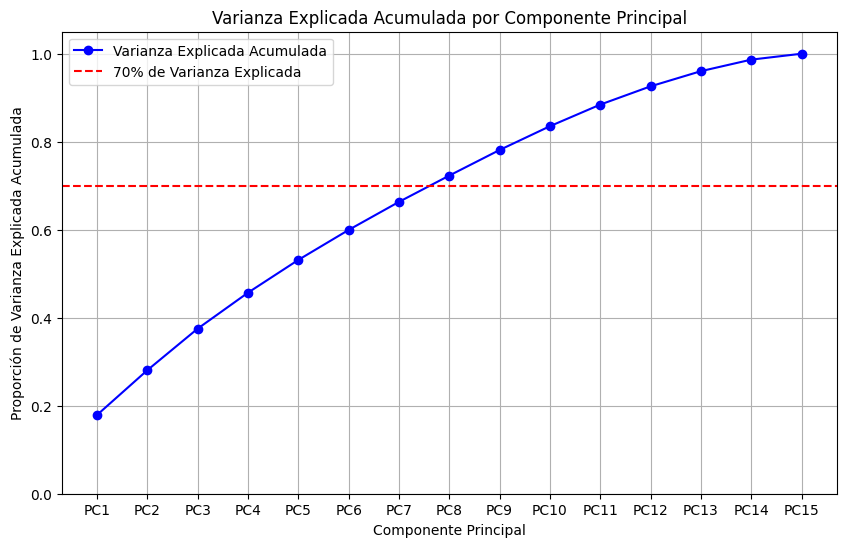

In [1280]:
# Estandarización de las columnas numéricas.
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(numeric_columns)

# Aplicación de PCA.
pca = PCA()
pca.fit_transform(scaled_columns)

# Cálculo de la varianza explicada acumulada.
autovalores = pca.explained_variance_
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Gráfico de la varianza explicada acumulada.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='b', label='Varianza Explicada Acumulada')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% de Varianza Explicada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1), labels=[f'PC{i+1}' for i in range(len(varianza_explicada_acumulada))])
plt.ylim(0, 1.05)
plt.legend()
plt.grid()
plt.show()


### *UMAP*.

Debido a que las variables del *dataset* no parecen relacionarse linealmente, se decidió optar por una técnica no lineal de reducción de la dimensionalidad. Entre las opciones, se evalúo la posibilidad de utilizar t-SNE o UMAP. Se decidió optar por esta última, puesto a que:

- Es, en general, más rápida que t-SNE.
- Preserva más de la estructura global que t-SNE.

Con esto en cuenta, utilizando un *dataset* que no cuente con variables dicotómicas (puesto a que dominarían en la *clusterización*), se aplicó UMAP al conjunto de datos, reduciendo la dimensionalidad a dos dimensiones:

In [1281]:
# Aplicación de escalado. Utilizamos el dataset definido en el análisis bivariado,
scaled_columns = scaler.fit_transform(reduced_dataset)

# Aplicación de UMAP.
umap_model = umap.UMAP(n_components=2, random_state=39, n_neighbors=5, n_jobs=1)
applied_umap = umap_model.fit_transform(scaled_columns)

# Creación de un DataFrame para almacenar los resultados de UMAP.
umap_df = pd.DataFrame(applied_umap, columns=['Dimensión 1', 'Dimensión 2'])

# Agregado del índice a cada registro para su identificación en el gráfico interactivo.
umap_df["Registro"] = modified_dataset.index

# Definición de función para graficado del espacio bidimensional.
# Se referenciará a ella a lo largo de toda la sección.
def graficar_UMAP(dataset, variable_coloreada):
    
    # Creación del gráfico de dispersión.
    fig = px.scatter(
        dataset, 
        x="Dimensión 1", 
        y="Dimensión 2", 
        color=variable_coloreada, # Pintado de las muestras según el cluster al que pertenezcan.
        title=f"UMAP - Espacio Bidimensional",
        color_continuous_scale="viridis",
        hover_data={variable_coloreada: True, "Registro": True}  # Personalización de las etiquetas en el gráfico interactivo.
    )

    # Configuración de los ejes.
    fig.update_layout(
        width = 800,
        height = 600,
        xaxis_title="Dimensión 1",
        yaxis_title="Dimensión 2",
    )
    
    # Configuración de la barra de color.
    fig.update_layout(
    coloraxis_colorbar=dict(
        title=variable_coloreada,
        title_font_size=18,
        title_font_family="Arial",
        title_font_color="navy",
        title_side="right",
        lenmode="fraction",
        len=0.6,  # Adjust the length of the colorbar as needed
        thickness=20  # Adjust the thickness of the colorbar as needed
    ),
    margin=dict(r=100)  # Adjust the right margin to accommodate the colorbar
)

    configurar_fondo(fig)

    # Agregado de un marco a la barra de colores.
    fig.update_coloraxes(colorbar_outlinecolor='black', colorbar_outlinewidth=2)

    # Cambio del tamaño de las observaciones.
    fig.update_traces(marker=dict(size=8))

    fig.show()

graficar_UMAP(umap_df, None)

No es posible observar a simple vista ninguna agrupación bien diferenciada. Se decidió, entonces, emplear una técnica de *clustering* para observar si es posible identificar algún grupo no evidente gráficamente.

### *Clustering*.

Con la finalidad de determinar el número de *clusters* óptimo, se realizó un *elbow plot* o *gráfico del codo*:

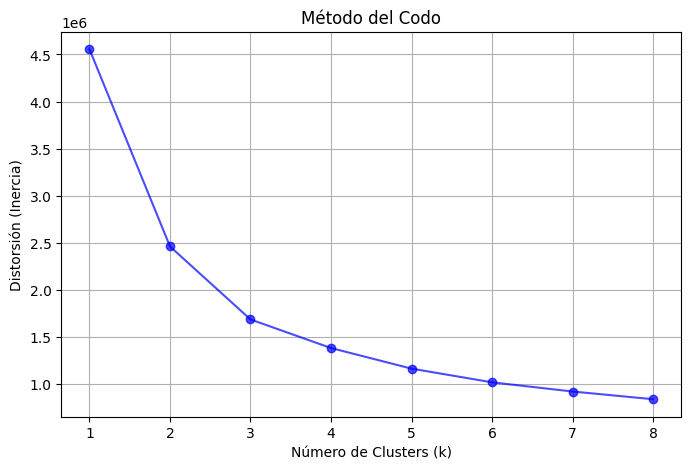

In [1282]:
# Cálculo de la distorsión utilizando.
def elbow_plot(dataset, n):
    distortions = []
    K = range(1, n)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=39)
        kmeans.fit_predict(dataset)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bo-', alpha=0.7)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Distorsión (Inercia)')
    plt.title('Método del Codo')
    plt.grid(True)
    plt.show()

elbow_plot(reduced_dataset, 9)

El número óptimo de *clusters* pareciera ser *3*. Mediante el coeficiente de Silhouette y el índice de Davies-Boulding se realizó la comprobación:

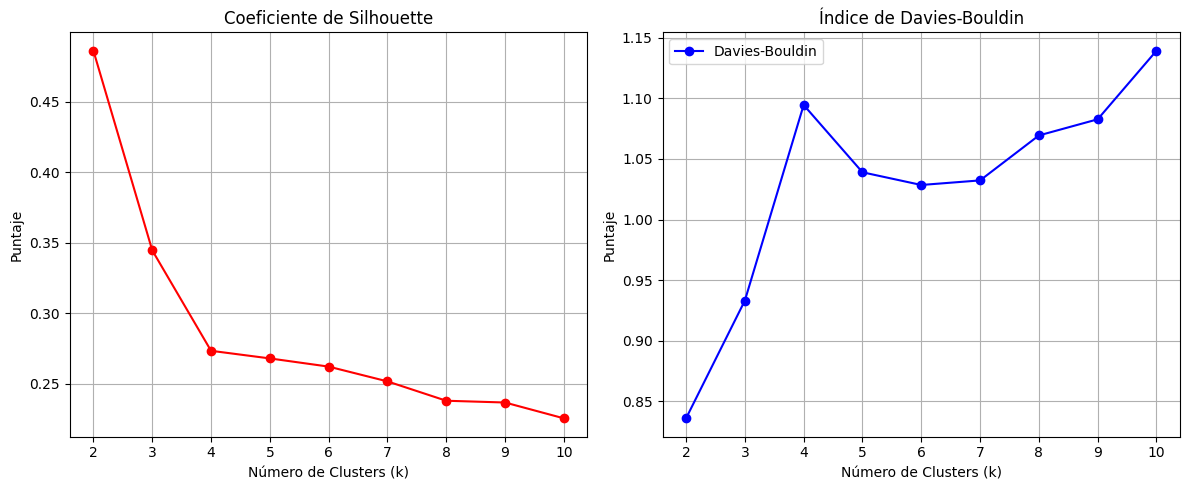

In [1283]:
def graficar_silhouette_davies_bouldin(dataset):

    silhouette = []
    davies_bouldin = []

    K = range(2, 11)

    for k in K:
        
        kmeans = KMeans(n_clusters=k, random_state=39)
        clusters = kmeans.fit_predict(dataset)
        
        silhouette.append(silhouette_score(dataset, clusters))
        
        davies_bouldin.append(davies_bouldin_score(dataset, clusters))

    # Creación de figuras y subgráficos.
    _, (silhouette_plot, davies_bouldin_plot) = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico para el índice de Silhouette
    silhouette_plot.plot(K, silhouette, '-ro', label='Silhouette')
    silhouette_plot.set_xlabel('Número de Clusters (k)')
    silhouette_plot.set_ylabel('Puntaje')
    silhouette_plot.set_title('Coeficiente de Silhouette')
    silhouette_plot.grid(True)

    # Gráfico para el índice de Davies-Bouldin
    davies_bouldin_plot.plot(K, davies_bouldin, '-bo', label='Davies-Bouldin')
    davies_bouldin_plot.set_xlabel('Número de Clusters (k)')
    davies_bouldin_plot.set_ylabel('Puntaje')
    davies_bouldin_plot.set_title('Índice de Davies-Bouldin')
    davies_bouldin_plot.legend()
    davies_bouldin_plot.grid(True)

    # Mostrar ambos gráficos
    plt.tight_layout()
    plt.show()
    
graficar_silhouette_davies_bouldin(reduced_dataset)

Mientras más alto es el coeficiente de Silhouette y menor es el índice de Davies-Boulding, mejor es el *k* elegido. Con esto en cuenta, contrario a lo especulado utilizando el *elbow plot*, se determina que *2* es la elección óptima de *clusters*.

Habiendo determinado el número óptimo de *clusters*, se realizó la *clusterización* utilizando *K-Means* y se gráfico el espacio reducido pintando las observaciones según el *cluster* al que pertenecen:

In [1284]:
# Aplicación de K-Means clustering.
kmeans = KMeans(n_clusters=2, random_state=39)
clusters = kmeans.fit_predict(reduced_dataset)

# Agregado de una columna para identificación del cluster al que pertenece el registro.
umap_df["Cluster"] = clusters

# Visualización del espacio reducido.
graficar_UMAP(umap_df, "Cluster")

Los *clusters* no parecen indicar nada relevante. Al analizar qué variables pudieron influenciar en la *clusterización*, no fue posible hallar ninguna que haya tenido un impacto notorio.

La reducción de la dimensionalidad y el *clustering* también fueron aplicados separando los datos según su tono (*Mode*) y, luego, según su compás (*Time_Signature*). Adicionalmente, se intentó utilizar *clustering* jerárquico como alternativa a KMeans. El código para ello no se incluye puesto a que, al igual que para el análisis anterior, no fue posible dar con ningún resultado significativo y provocaría que la sección quede innecesariamente extensa en comparación a su aporte al análisis.

Finalmente, se concluyó que la aplicación de reducción de la dimensionalidad y *clustering* no es de utilidad para el análisis del *dataset*.

# 3. *Test* de Hipótesis.

A partir de la información obtenida a lo largo del análisis, se plantearon las siguientes hipótesis para el *dataset* de estudio:

## 3.1. Frecuencia de la tonalidad a través de los años.

La frecuencia relativa de las tonalidades en la década de los 70’s es representativa del último siglo.

Retomando lo comenzado en la sección *2.1. Análisis Univariado*, se quiere demostrar que la frecuencia relativa de las tonalidades en los 70's es representativa de su frecuencia relativa en el último siglo:

In [1285]:
# Evaluamos normalidad de la variable sepal_length para setosa
stat, p = shapiro(combined["Original [1970, 1980)"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(combined["Extendido [1920, 2022]"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.983, p-valor=0.992
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.945, p-valor=0.559


In [1286]:
stat, p = levene(combined["Original [1970, 1980)"], combined["Extendido [1920, 2022]"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.647, p-valor=0.430


In [1287]:
from scipy.stats import ttest_rel

# Aplicar el test t de muestras apareadas
t_stat, p_value = ttest_rel(combined["Original [1970, 1980)"], combined["Extendido [1920, 2022]"])

# Mostrar resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 5.835871820751226e-16
P-value: 0.9999999999999996


No hay suficiente evidencia para rechazar la hipótesis nula. Por lo tanto, no existe una diferencia signfificativa en la frecuencia de uso de las tonalidades o *keys* en la década de los 70's y en los últimos cien años.

## 3.2. La alegría del baile.

Las canciones de gran duración no son adecuadas para bailar.

Definición de lo que consideramos bailabilidad alta y bailabilidad baja:

In [1288]:
high_danceability_dataset = modified_dataset.query("Danceability >= 0.75")
low_danceability_dataset = modified_dataset.query("Danceability < 0.75")

In [1289]:
stat, p = shapiro(low_danceability_dataset["Valence"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(high_danceability_dataset["Valence"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.959, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.823, p-valor=0.000


In [1290]:
stat, p = levene(low_danceability_dataset["Valence"], high_danceability_dataset["Valence"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=37.159, p-valor=0.000


In [1291]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = kruskal(low_danceability_dataset["Valence"], high_danceability_dataset["Valence"])
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la valencia entre las canciones con alta danceabilidad y baja danceabilidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la valencia entre las canciones con alta danceabilidad y baja danceabilidad.")

Test de Kruskal-Wallis para Tempo: Estadístico=90.857, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la valencia entre las canciones con alta danceabilidad y baja danceabilidad.


In [1292]:
def graficar_boxplot_comparativo(dataset1, dataset2, grupos, variable):
    
    # Combinación de los datasets y creación de una columna temporal con el nombre indicado.
    df_combined = pd.concat([
        dataset1.assign(**{grupos[0]: grupos[1]}),
        dataset2.assign(**{grupos[0]: grupos[2]})
    ], ignore_index=True)

    # Creación del boxplot.
    fig = px.box(df_combined, x=grupos[0], y=variable, color=grupos[0],
                title=f"Comparación de la distribución de '{variable}' entre los grupos con {grupos[0]} {grupos[1]} y {grupos[2]}",
                notched=True)
    
    configurar_fondo(fig)

    # Visualización del gráfico.
    fig.show()
    
graficar_boxplot_comparativo(low_danceability_dataset, high_danceability_dataset, ["Bailabilidad", "Baja", "Alta"], "Valence")

## 3.3. Los pies se cansan.

In [1293]:
stat, p = shapiro(low_danceability_dataset["Duration"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(high_danceability_dataset["Duration"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.884, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.915, p-valor=0.000


In [1294]:
stat, p = levene(low_danceability_dataset["Duration"], high_danceability_dataset["Duration"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.302, p-valor=0.583


In [1295]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = mannwhitneyu(high_danceability_dataset["Duration"], low_danceability_dataset["Duration"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")

Test de Mann-Whitney U para Energy: Estadístico=59526.500, p-valor=0.334
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.


In [1296]:
graficar_boxplot_comparativo(low_danceability_dataset, high_danceability_dataset, ["Bailabilidad", "Alta", "Baja"], "Duration")

## 3.4. La importancia del ritmo.

Las canciones con menor nivel de habla son más bailables.

In [1297]:
stat, p = shapiro(low_danceability_dataset["Speechiness"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(high_danceability_dataset["Speechiness"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.454, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.682, p-valor=0.000


In [1298]:
stat, p = levene(low_danceability_dataset["Speechiness"], high_danceability_dataset["Speechiness"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=1.914, p-valor=0.167


In [1299]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = mannwhitneyu(high_danceability_dataset["Speechiness"], low_danceability_dataset["Speechiness"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.")

Test de Mann-Whitney U para Energy: Estadístico=78738.000, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la duración entre las canciones con bailabilidad alta y bailabilidad baja.


In [1300]:
graficar_boxplot_comparativo(low_danceability_dataset, high_danceability_dataset, ["Bailabilidad", "Alta", "Baja"], "Speechiness")

## 3.5.

In [1301]:
mode0_dataset = modified_dataset.query("Mode == 0")
mode1_dataset = modified_dataset.query("Mode == 1")

In [1302]:
stat, p = shapiro(mode0_dataset["Danceability"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Evaluamos normalidad de la variable sepal_length para virginica
stat, p = shapiro(mode1_dataset["Danceability"])
print(f"Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para sepal_length (tipo=0): Estadístico=0.965, p-valor=0.000
Test de Shapiro-Wilk para sepal_length (tipo=1): Estadístico=0.991, p-valor=0.000


In [1303]:
stat, p = levene(mode0_dataset["Danceability"], mode1_dataset["Danceability"])
print(f"Test de Levene para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Population_mln: Estadístico=0.231, p-valor=0.631


In [1304]:
# Test de Mann-Whitney U para comparar Population_mln entre países desarrollados y en vías de desarrollo
stat, p = mannwhitneyu(mode0_dataset["Danceability"], mode1_dataset["Danceability"])
print(f"Test de Mann-Whitney U para Energy: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la bailabilidad entre las canciones con tono mayor y menor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la bailabilidad entre las canciones con tono mayor y menor.")

Test de Mann-Whitney U para Energy: Estadístico=86811.500, p-valor=0.004
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la bailabilidad entre las canciones con tono mayor y menor.


In [1305]:
graficar_boxplot_comparativo(mode0_dataset, mode1_dataset, ["Tono", "Mayor", "Menor"], "Danceability")

## 3.6. ¿Qué es esto? ¿Se puede bailar?

Dadas los resultados de las hipótesis anteriores, la variable bailabilidad debería poder ser predicha con éxito mayormente con conjunto de variables “Valence, Mode, Speechiness” en combinación con él resto de variables.

En la siguiente sección, validaremos, utilizando regresión lineal, si, efectivamente, es posible realizar la predicción de la variable.

# 4. Modelado y Predicción.

ANTES de sacar los datos de validación:
Entrenamiento = (634, 13)
Test = (272, 13)
---------------------------------------
5      0.568
378    0.665
774    0.760
543    0.480
928    0.781
       ...  
852    0.497
685    0.579
248    0.430
756    0.773
167    0.584
Name: Danceability, Length: 634, dtype: float64
DESPUÉS de sacar los datos de validación:
Entrenamiento = (570, 13)
Validación = (64, 13)
Test = (272, 13)
---------------------------------------
Medias = [ 2.27128070e+02  3.95438596e+00  5.81367404e-01  5.16666667e+00
 -9.97650175e+00  7.33333333e-01  6.25747368e-02  3.30036209e-01
  1.79370526e-01  6.26396333e-01  5.47263158e+01  1.97452456e+03
  3.58771930e+00]
Desvíos = [64.52351198  0.20864658  0.19579399  3.54647506  3.77167942  0.44221664
  0.07039001  0.27431132  0.15576797  0.24600543 15.79225356  2.85625081
  1.91399006]


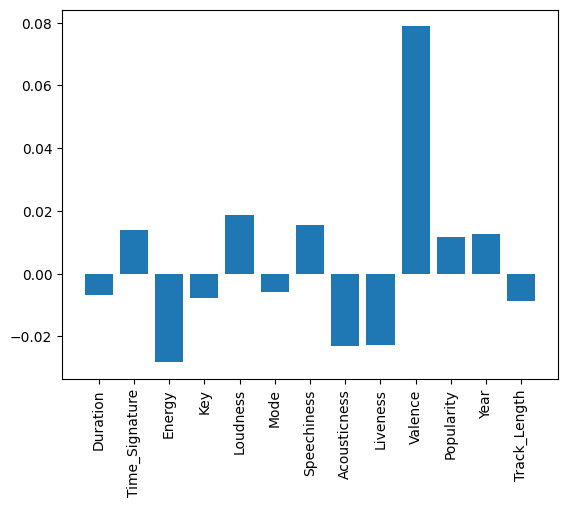

In [1306]:
X = numeric_columns.drop(columns=["Danceability", "Tempo"])
y = numeric_columns["Danceability"]

# Discretizamos la variable objetivo para la estratificación
y_binned = pd.cut(y, bins=10, labels=False)

# Partimos los datos en entrenamiento y test, sacando el 30% para los datos de test
# y el restante 70% para los de entrenamiento, estratificando usando la versión "binneada"
# de la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=10, # usamos una semilla aleatoria para ser reproducibles
                                                    stratify = y_binned)

print("ANTES de sacar los datos de validación:")
print("Entrenamiento = {}".format(X_train.shape))
print("Test = {}".format(X_test.shape))
print("---------------------------------------")

print(y_train)

# Repetimos ell estratificado con y_train porque no tenemos los índices del estratificado anterior
y_train_binned = pd.cut(y_train, bins=10, labels=False)

# y aplicamos nuevamente la función pero sobre los datos de entrenamiento, esta vez
# para extraer los datos de validación, tomando el 10% para ese conjunto
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  random_state=10, # usamos una semilla aleatoria para ser reproducibles
                                                  stratify = y_train_binned)

print("DESPUÉS de sacar los datos de validación:")
print("Entrenamiento = {}".format(X_train.shape))
print("Validación = {}".format(X_val.shape))
print("Test = {}".format(X_test.shape))
print("---------------------------------------")


# creamos un standard scaler
scaler = StandardScaler()
# y lo fiteamos con los datos de entrenamiento
scaler.fit(X_train)

# podemos acceder a las medias y desvíos que calculamos, si queremos
print("Medias = {}".format(scaler.mean_))
print("Desvíos = {}".format(np.sqrt(scaler.var_)))

# estandarizamos las muestras de entrenamiento
X_train_stand = scaler.transform(X_train)

# creamos un modelo de regresión lineal, indicándole que queremos
# que ajuste la ordenada al origen
model = LinearRegression(fit_intercept=True)

# entrenamos el modelo
model.fit(X_train_stand, y_train)

# recuperamos sus coeficientes aprendidos
theta = model.coef_

# y los mostramos por pantalla
fig = plt.figure()
ax = fig.gca()
ax.bar(np.arange(0,theta.size), np.squeeze(theta))
labels = X.columns
ax.set_xticks(np.arange(0,theta.size))
ax.set_xticklabels(labels=labels, rotation = 90)
plt.show()

In [1307]:
# agregamos el scaler como un atributo al objeto para no perderlo
model.standardizer_ = scaler

# estandarizamos los datos de validación y predecimos
X_val_stand = model.standardizer_.transform(X_val)
y_pred_val = model.predict(X_val_stand)
# mostramos lo que obtuvimos
print("Valores obtenidos: {}".format(y_pred_val))
# y lo que esperábamos obtener
print("Valores esperados: {}".format(np.array(y_val)))

Valores obtenidos: [0.63988841 0.73098117 0.61881575 0.72488211 0.77962296 0.70239185
 0.64480175 0.70136326 0.44200456 0.47999678 0.43698294 0.46528989
 0.69123414 0.67428928 0.5652884  0.52681219 0.42620701 0.50364242
 0.68714601 0.53247985 0.62161149 0.6008376  0.63635734 0.68125799
 0.72620363 0.44735501 0.70572305 0.67901805 0.47434068 0.71635344
 0.6101313  0.39604592 0.61036742 0.69596037 0.47573186 0.62224481
 0.49063594 0.47045912 0.37528724 0.63597315 0.54695513 0.6790412
 0.56137311 0.71953608 0.68900296 0.60737764 0.65131306 0.54121395
 0.49558107 0.49697145 0.53906252 0.66620066 0.49280903 0.60691243
 0.59131136 0.67926059 0.60145871 0.65704214 0.61499795 0.67135601
 0.66253897 0.74155243 0.71306979 0.55211223]
Valores esperados: [0.788 0.823 0.424 0.734 0.911 0.537 0.571 0.797 0.457 0.283 0.46  0.489
 0.637 0.701 0.271 0.637 0.472 0.317 0.565 0.705 0.526 0.632 0.692 0.743
 0.632 0.351 0.673 0.859 0.254 0.37  0.665 0.51  0.576 0.632 0.467 0.557
 0.541 0.432 0.583 0.305 0.5

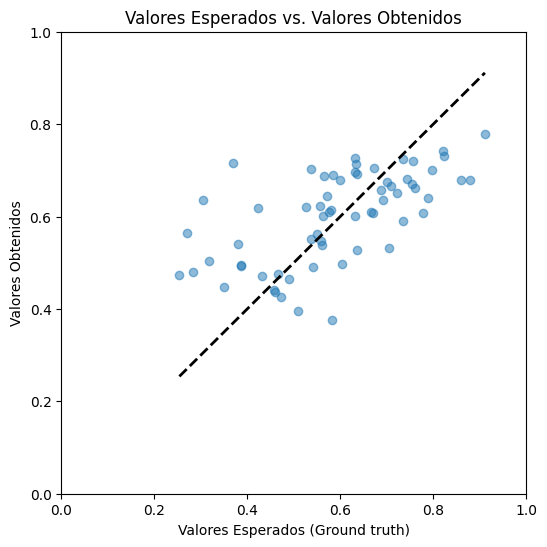

In [1308]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.xlabel("Valores Esperados (Ground truth)")
plt.ylabel("Valores Obtenidos")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.title("Valores Esperados vs. Valores Obtenidos")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()

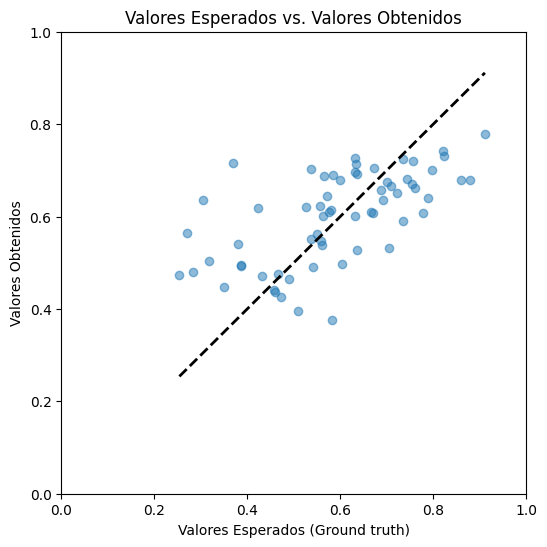

MSE = 0.0154
RMSE = 0.1240
MAE = 0.0979
MAE en entrenamiento: 0.0970
MAE en validación: 0.0979


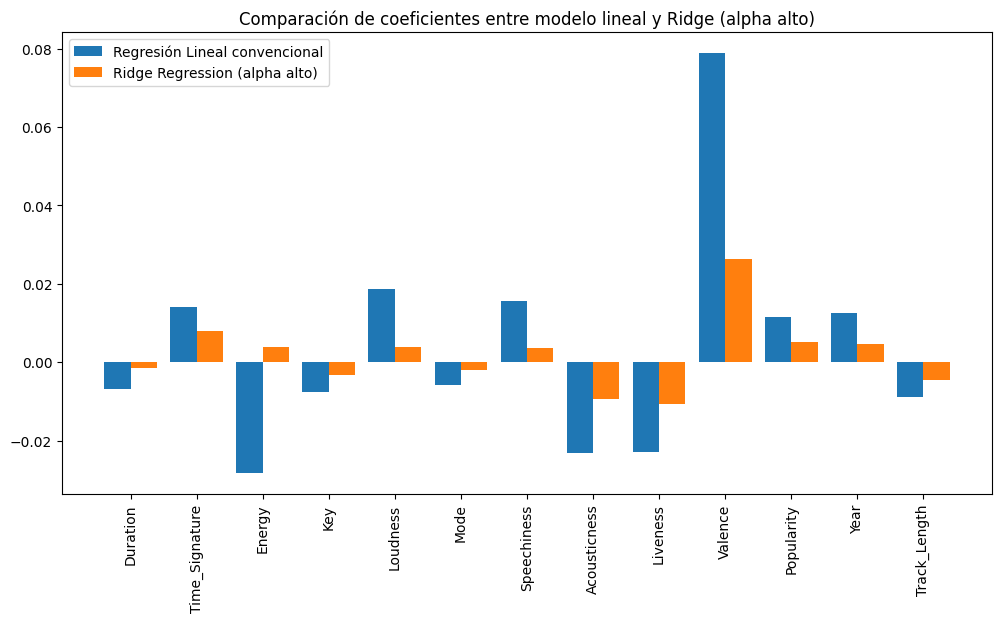

MAE en validación (modelo convencional): 0.0979
MAE en validación (Ridge, alpha alto): 0.1092
El mejor alpha es:  0.001
MAE en validación (modelo convencional): 0.09785
MAE en validación (Ridge, alpha alto): 0.10916
MAE en validación (Ridge, mejor alpha): 0.09785


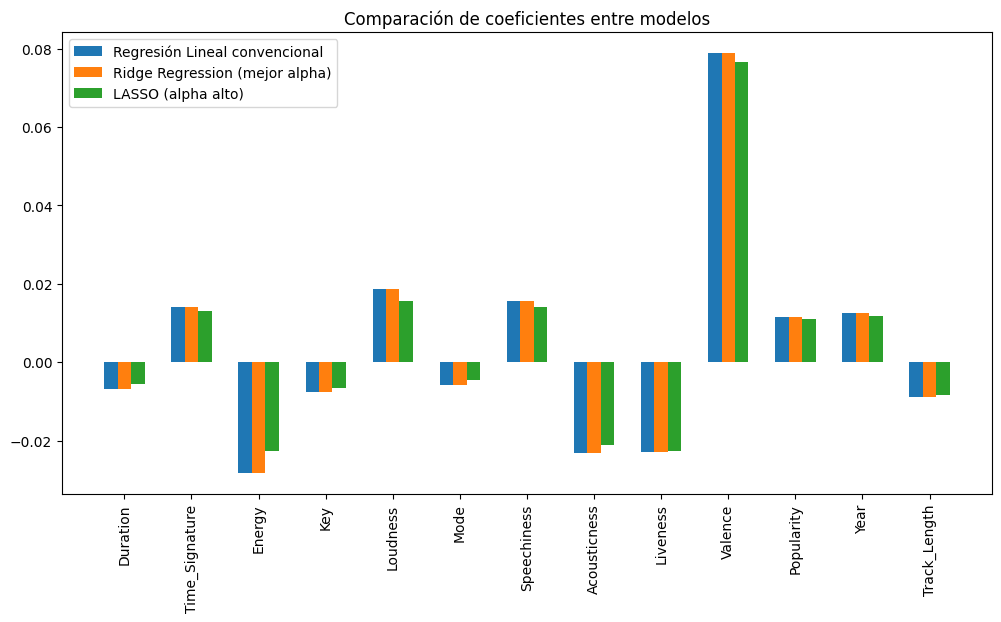

El mejor alpha para Lasso es:  0.001
MAE en validación (modelo convencional): 0.09785
MAE en validación (Ridge, mejor alpha): 0.09785
MAE en validación (Lasso, mejor alpha): 0.09822


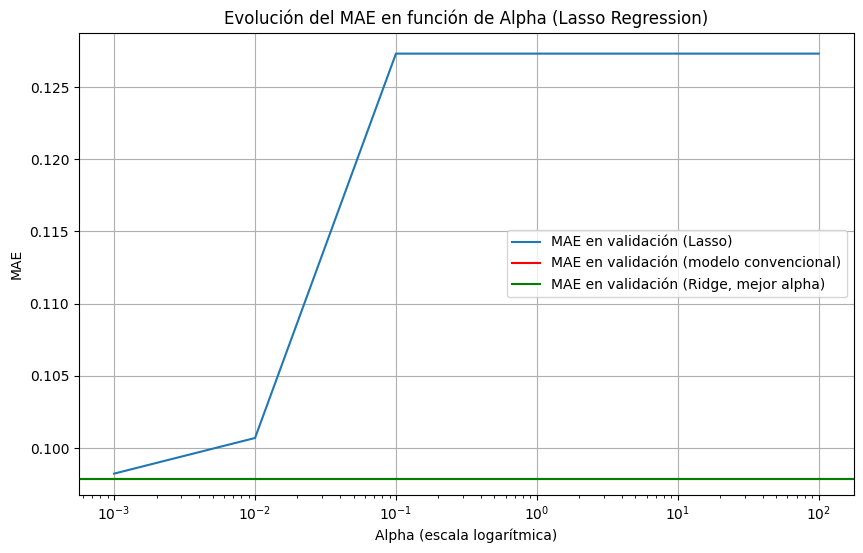

MAE en test:
Modelo convencional: 0.10125
Ridge (mejor alpha): 0.10125
Lasso (mejor alpha): 0.10144

MSE en test:
Modelo convencional: 0.01512
Ridge (mejor alpha): 0.01512
Lasso (mejor alpha): 0.01517

RMSE en test:
Modelo convencional: 0.12297
Ridge (mejor alpha): 0.12297
Lasso (mejor alpha): 0.12318


In [1309]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.xlabel("Valores Esperados (Ground truth)")
plt.ylabel("Valores Obtenidos")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.title("Valores Esperados vs. Valores Obtenidos")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# calculamos las métricas
mse = mean_squared_error(y_val, y_pred_val)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred_val)

# las imprimimos por pantalla
print("MSE = {:.4f}".format(mse))
print("RMSE = {:.4f}".format(rmse))
print("MAE = {:.4f}".format(mae))
# Predecir en X_train_stand y X_val_stand
y_pred_train = model.predict(X_train_stand)
y_pred_val = model.predict(X_val_stand)

# Calcular el MAE para entrenamiento y validación
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_val = mean_absolute_error(y_val, y_pred_val)

print("MAE en entrenamiento: {:.4f}".format(mae_train))
print("MAE en validación: {:.4f}".format(mae_val))
from sklearn.linear_model import Ridge

# Creamos un modelo de Ridge Regression con un valor alto de alpha
ridge_model_high_alpha = Ridge(alpha=1000)
# Le asociamos el scaler así no lo perdemos
ridge_model_high_alpha.standardizer_ = scaler
# Entrenamos el modelo
ridge_model_high_alpha.fit(X_train_stand, y_train)
# Recuperamos los coeficientes del modelo Ridge
theta_ridge_high_alpha = ridge_model_high_alpha.coef_

# graficamos los dos
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, theta.size) - 0.2, np.squeeze(theta), width=0.4, label='Regresión Lineal convencional')
ax.bar(np.arange(0, theta_ridge_high_alpha.size) + 0.2, np.squeeze(theta_ridge_high_alpha), width=0.4, label='Ridge Regression (alpha alto)')
labels = X.columns
ax.set_xticks(np.arange(0, theta.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.legend()
ax.set_title('Comparación de coeficientes entre modelo lineal y Ridge (alpha alto)')
plt.show()
# Predecir en X_val_stand con el modelo Ridge
y_pred_val_ridge_high_alpha = ridge_model_high_alpha.predict(X_val_stand)

# Calcular el MAE para el modelo Ridge
mae_val_ridge_high_alpha = mean_absolute_error(y_val, y_pred_val_ridge_high_alpha)

print("MAE en validación (modelo convencional): {:.4f}".format(mae_val))
print("MAE en validación (Ridge, alpha alto): {:.4f}".format(mae_val_ridge_high_alpha))
# Definimos los valores de alpha que queremos probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Creamos una lista vacía para almacenar los errores MAE para cada valor de alpha
mae_list = []

# Iteramos sobre los valores de alpha
for alpha in alphas:
  # Creamos un modelo de Ridge Regression con el valor de alpha actual
  ridge_model = Ridge(alpha=alpha)
  ridge_model.standardizer_ = scaler
  # Entrenamos el modelo
  ridge_model.fit(X_train_stand, y_train)
  # Predecimos en X_val_stand
  y_pred_val_ridge = ridge_model.predict(X_val_stand)
  # Calculamos el MAE
  mae_val_ridge = mean_absolute_error(y_val, y_pred_val_ridge)
  # Almacenamos el error MAE
  mae_list.append(mae_val_ridge)


# Encontrar el mejor alpha
best_alpha = alphas[np.argmin(mae_list)]
print("El mejor alpha es: ", best_alpha)

# Entrenar el modelo final con el mejor alpha
ridge_model_best_alpha = Ridge(alpha=best_alpha)
ridge_model_best_alpha.standardizer_ = scaler
ridge_model_best_alpha.fit(X_train_stand, y_train)
# Predecir en X_val_stand con el mejor modelo
y_pred_val_ridge_best_alpha = ridge_model_best_alpha.predict(X_val_stand)
# Calcular el MAE para el mejor modelo
mae_val_ridge_best_alpha = mean_absolute_error(y_val, y_pred_val_ridge_best_alpha)

print("MAE en validación (modelo convencional): {:.5f}".format(mae_val))
print("MAE en validación (Ridge, alpha alto): {:.5f}".format(mae_val_ridge_high_alpha))
print("MAE en validación (Ridge, mejor alpha): {:.5f}".format(mae_val_ridge_best_alpha))
from sklearn.linear_model import Lasso

# Creamos un modelo de LASSO con un valor MENOS alto de alpha
lasso_model_high_alpha = Lasso(alpha=0.001)
# Le asociamos el scaler así no lo perdemos
lasso_model_high_alpha.standardizer_ = scaler
# Entrenamos el modelo
lasso_model_high_alpha.fit(X_train_stand, y_train)

# Recuperamos los coeficientes del modelo LASSO
theta_lasso_high_alpha = lasso_model_high_alpha.coef_
# Y nos traemos ya que estamos los del modelo con el mejor alpha
theta_ridge_best_alpha = ridge_model_best_alpha.coef_

# Graficamos los coeficientes de los tres modelos
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, theta.size) - 0.2, np.squeeze(theta), width=0.2, label='Regresión Lineal convencional')
ax.bar(np.arange(0, theta_ridge_best_alpha.size), np.squeeze(theta_ridge_best_alpha), width=0.2, label='Ridge Regression (mejor alpha)')
ax.bar(np.arange(0, theta_lasso_high_alpha.size) + 0.2, np.squeeze(theta_lasso_high_alpha), width=0.2, label='LASSO (alpha alto)')
labels = X.columns
ax.set_xticks(np.arange(0, theta.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.legend()
ax.set_title('Comparación de coeficientes entre modelos')
plt.show()
# Definimos los valores de alpha que queremos probar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Creamos una lista vacía para almacenar los errores MAE para cada valor de alpha
mae_list_lasso = []

# Iteramos sobre los valores de alpha
for alpha in alphas:
  # Creamos un modelo de Lasso Regression con el valor de alpha actual
  lasso_model = Lasso(alpha=alpha)
  lasso_model.standardizer_ = scaler
  # Entrenamos el modelo
  lasso_model.fit(X_train_stand, y_train)
  # Predecimos en X_val_stand
  y_pred_val_lasso = lasso_model.predict(X_val_stand)
  # Calculamos el MAE
  mae_val_lasso = mean_absolute_error(y_val, y_pred_val_lasso)
  # Almacenamos el error MAE
  mae_list_lasso.append(mae_val_lasso)

# Encontrar el mejor alpha
best_alpha_lasso = alphas[np.argmin(mae_list_lasso)]
print("El mejor alpha para Lasso es: ", best_alpha_lasso)

# Entrenar el modelo final con el mejor alpha
lasso_model_best_alpha = Lasso(alpha=best_alpha_lasso)
lasso_model_best_alpha.standardizer_ = scaler
lasso_model_best_alpha.fit(X_train_stand, y_train)

# Predecir en X_val_stand con el mejor modelo
y_pred_val_lasso_best_alpha = lasso_model_best_alpha.predict(X_val_stand)

# Calcular el MAE para el mejor modelo
mae_val_lasso_best_alpha = mean_absolute_error(y_val, y_pred_val_lasso_best_alpha)

print("MAE en validación (modelo convencional): {:.5f}".format(mae_val))
print("MAE en validación (Ridge, mejor alpha): {:.5f}".format(mae_val_ridge_best_alpha))
print("MAE en validación (Lasso, mejor alpha): {:.5f}".format(mae_val_lasso_best_alpha))
# Graficar la evolución de MAE en función de alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mae_list_lasso, label="MAE en validación (Lasso)")
plt.axhline(y=mae_val, color='red', label='MAE en validación (modelo convencional)')
plt.axhline(y=mae_val_ridge_best_alpha, color='green', label='MAE en validación (Ridge, mejor alpha)')
plt.xscale('log')
plt.xlabel('Alpha (escala logarítmica)')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución del MAE en función de Alpha (Lasso Regression)')
plt.grid(True)
plt.show()
# Estandarizar X_test
X_test_stand = scaler.transform(X_test)

# Evaluar el modelo convencional en X_test_stand
y_pred_test = model.predict(X_test_stand)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)

# Evaluar Ridge con mejor alpha en X_test_stand
y_pred_test_ridge = ridge_model_best_alpha.predict(X_test_stand)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = math.sqrt(mse_test_ridge)

# Evaluar Lasso con mejor alpha en X_test_stand
y_pred_test_lasso = lasso_model_best_alpha.predict(X_test_stand)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = math.sqrt(mse_test_lasso)

print("MAE en test:")
print("Modelo convencional: {:.5f}".format(mae_test))
print("Ridge (mejor alpha): {:.5f}".format(mae_test_ridge))
print("Lasso (mejor alpha): {:.5f}".format(mae_test_lasso))

print("\nMSE en test:")
print("Modelo convencional: {:.5f}".format(mse_test))
print("Ridge (mejor alpha): {:.5f}".format(mse_test_ridge))
print("Lasso (mejor alpha): {:.5f}".format(mse_test_lasso))

print("\nRMSE en test:")
print("Modelo convencional: {:.5f}".format(rmse_test))
print("Ridge (mejor alpha): {:.5f}".format(rmse_test_ridge))
print("Lasso (mejor alpha): {:.5f}".format(rmse_test_lasso))